<a href="https://colab.research.google.com/github/XtremeAAA/Datathon-2025/blob/main/Datathon2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation 1

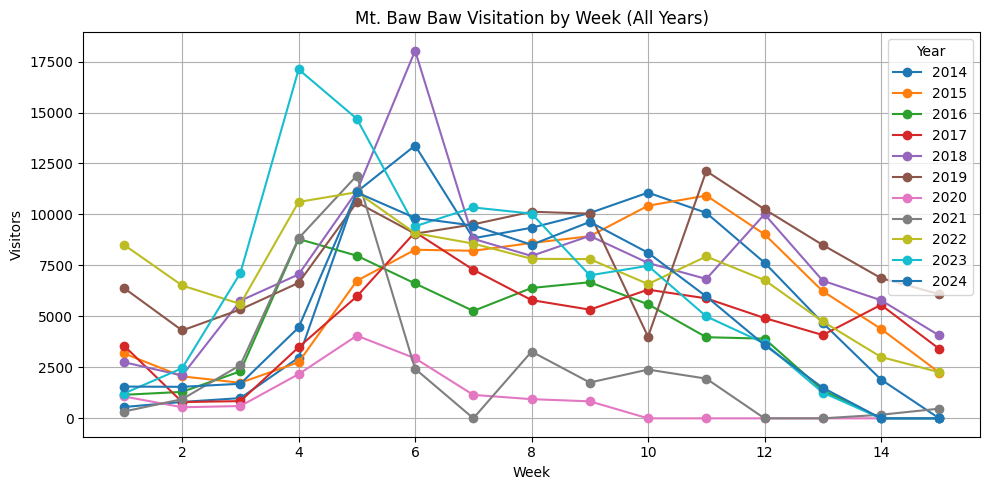

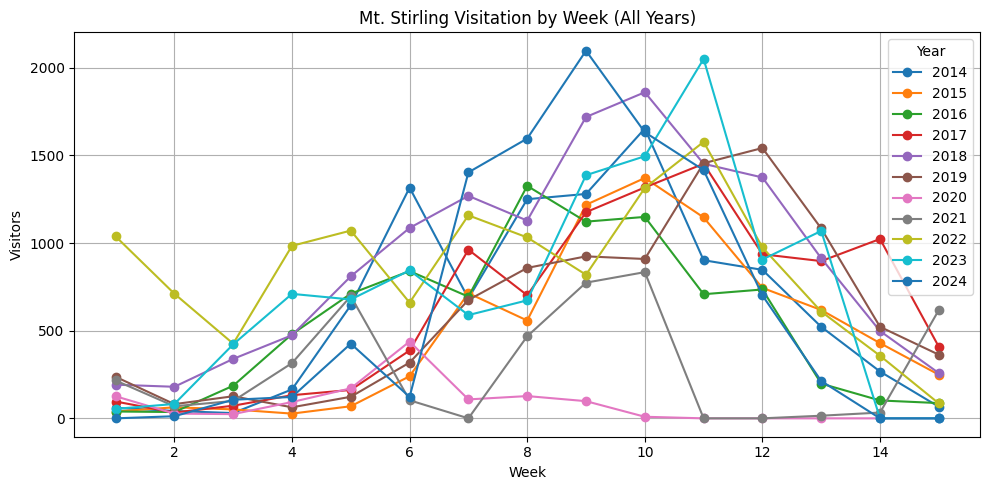

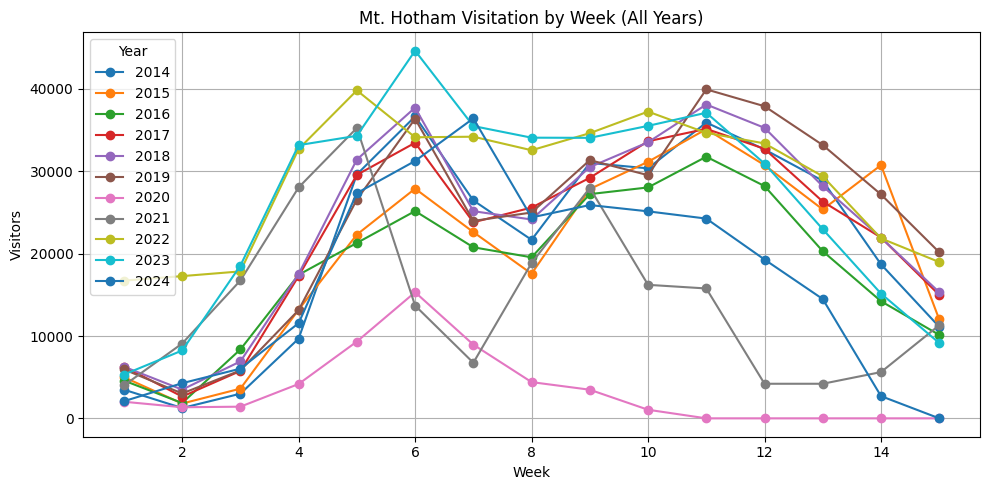

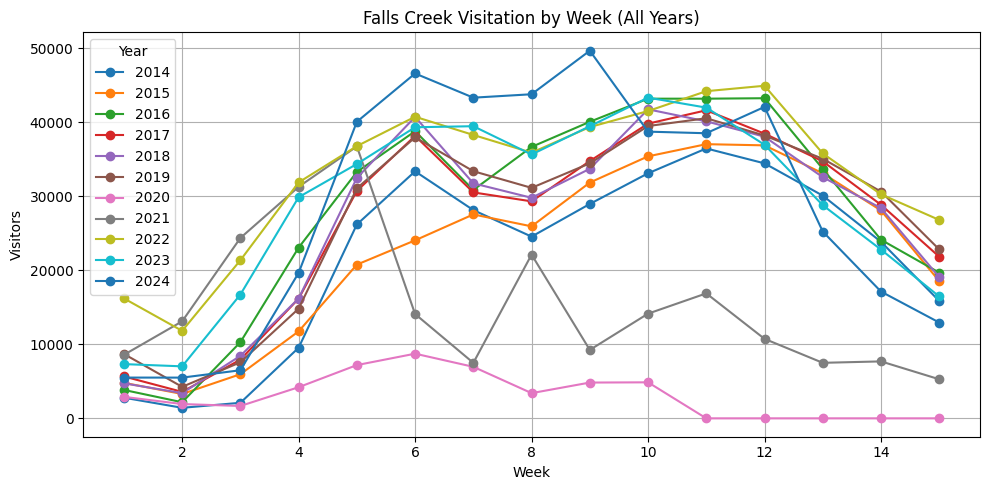

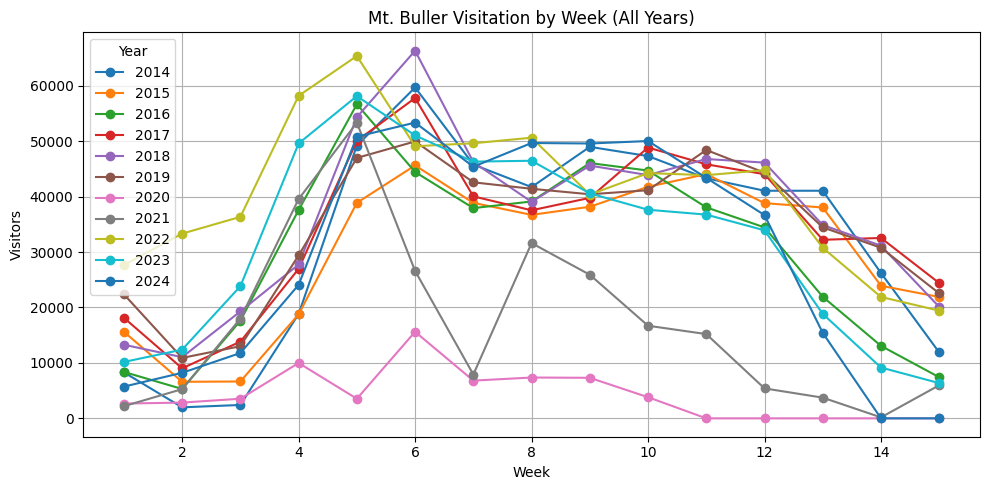

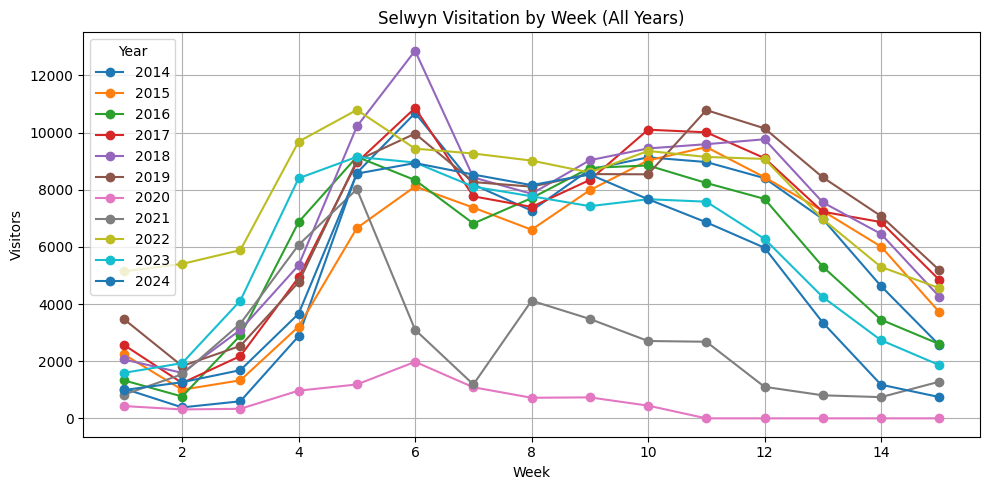

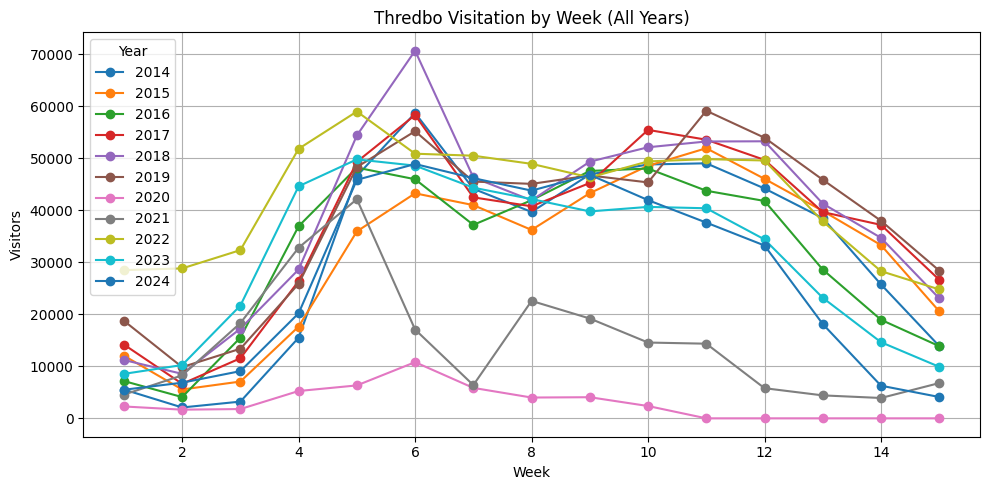

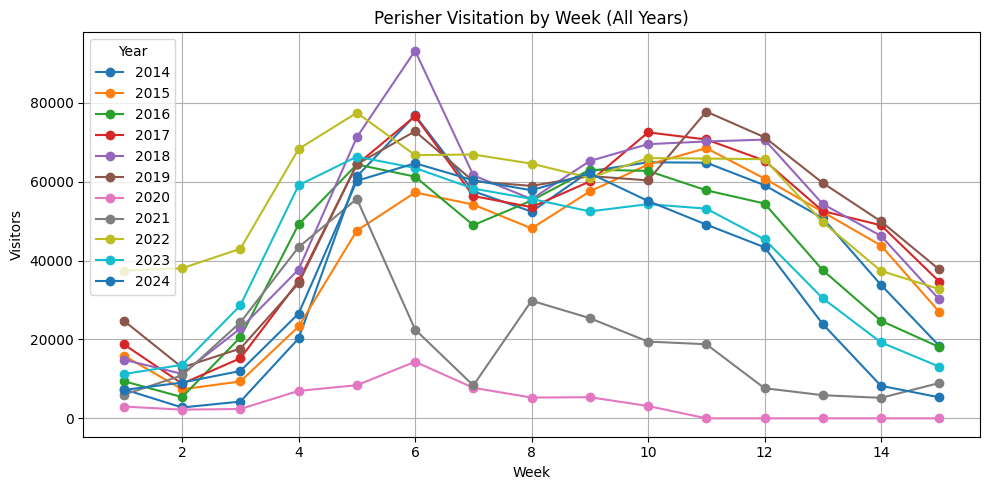

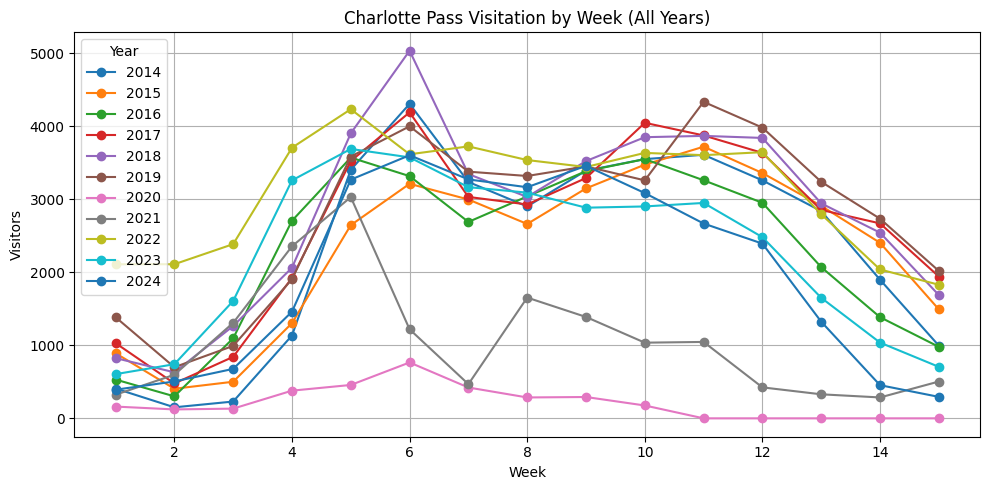

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("Visitation Data.csv")

# Clean up: drop rows where Year or Week is missing
df = df.dropna(subset=["Year", "Week"])

# Convert Year and Week to integers
df["Year"] = df["Year"].astype(int)
df["Week"] = df["Week"].astype(int)

# List of parks (skip Year and Week columns)
parks = [col for col in df.columns if col not in ["Year", "Week"]]
years = sorted(df["Year"].unique())

for park in parks:
    park_df = df.dropna(subset=[park])
    plt.figure(figsize=(10, 5))
    for year in years:
        yearly = park_df[park_df["Year"] == year]
        plt.plot(yearly["Week"], yearly[park], marker='o', label=str(year))
    plt.title(f"{park} Visitation by Week (All Years)")
    plt.xlabel("Week")
    plt.ylabel("Visitors")
    plt.grid(True)
    plt.legend(title="Year")
    plt.tight_layout()
    plt.show()

# Extracting 2018 Perisher

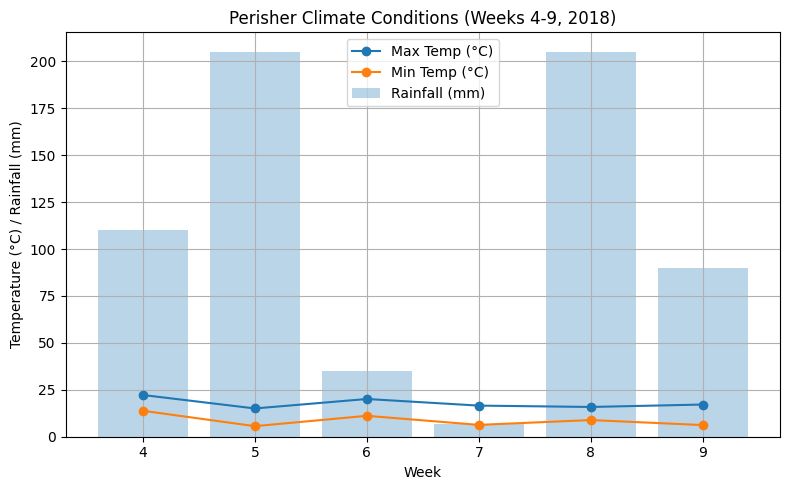

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load data
climate = pd.read_csv("/content/sample_data/Climate Data.csv")
visitation = pd.read_csv("/content/sample_data/Visitation Data.csv")

# Choose year and park
year = 2018
park = "Perisher"
weeks_of_interest = [4, 5, 6, 7, 8, 9]

# Filter climate data for the year
climate_year = climate[climate["Year"] == year].copy()

# Calculate the week number for each row
climate_year["Date"] = pd.to_datetime(dict(year=climate_year["Year"], month=climate_year["Month"], day=climate_year["Day"]))
climate_year["DayOfYear"] = climate_year["Date"].dt.dayofyear
climate_year["Week"] = ((climate_year["DayOfYear"] - 1) // 7) + 1

# Aggregate by week: mean temperature
weekly_climate = climate_year.groupby("Week").agg({
    "Maximum temperature (Degree C)": "mean",
    "Minimum temperature (Degree C)": "mean",
    "Rainfall amount (millimetres)": "sum"
}).reset_index()

# Filter for weeks 4-8
plot_data = weekly_climate[weekly_climate["Week"].isin(weeks_of_interest)]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(plot_data["Week"], plot_data["Maximum temperature (Degree C)"], marker='o', label="Max Temp (°C)")
plt.plot(plot_data["Week"], plot_data["Minimum temperature (Degree C)"], marker='o', label="Min Temp (°C)")
plt.bar(plot_data["Week"], plot_data["Rainfall amount (millimetres)"], alpha=0.3, label="Rainfall (mm)")

plt.title(f"Perisher Climate Conditions (Weeks 4-9, {year})")
plt.xlabel("Week")
plt.ylabel("Temperature (°C) / Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Clean up: drop rows where Year or Week is missing
visitation = visitation.dropna(subset=["Year", "Week"])

# Convert Year and Week to integers
visitation["Year"] = visitation["Year"].astype(int)
visitation["Week"] = visitation["Week"].astype(int)

# List of parks (skip Year and Week columns)
parks = [col for col in visitation.columns if col not in ["Year", "Week"]]
years = sorted(visitation["Year"].unique())

tabs = widgets.Tab()
children = []

for park in parks:
    output = widgets.Output()
    with output:
        plt.figure(figsize=(10, 5))
        park_df = visitation.dropna(subset=[park])
        for year in years:
            yearly = park_df[park_df["Year"] == year]
            plt.plot(yearly["Week"], yearly[park], marker='o', label=str(year))
        plt.title(f"{park} Visitation by Week (All Years)")
        plt.xlabel("Week")
        plt.ylabel("Visitors")
        plt.grid(True)
        plt.legend(title="Year")
        plt.tight_layout()
        plt.show()
    children.append(output)

tabs.children = children
for i, park in enumerate(parks):
    tabs.set_title(i, park)
display(tabs)

# Weather + Visitors

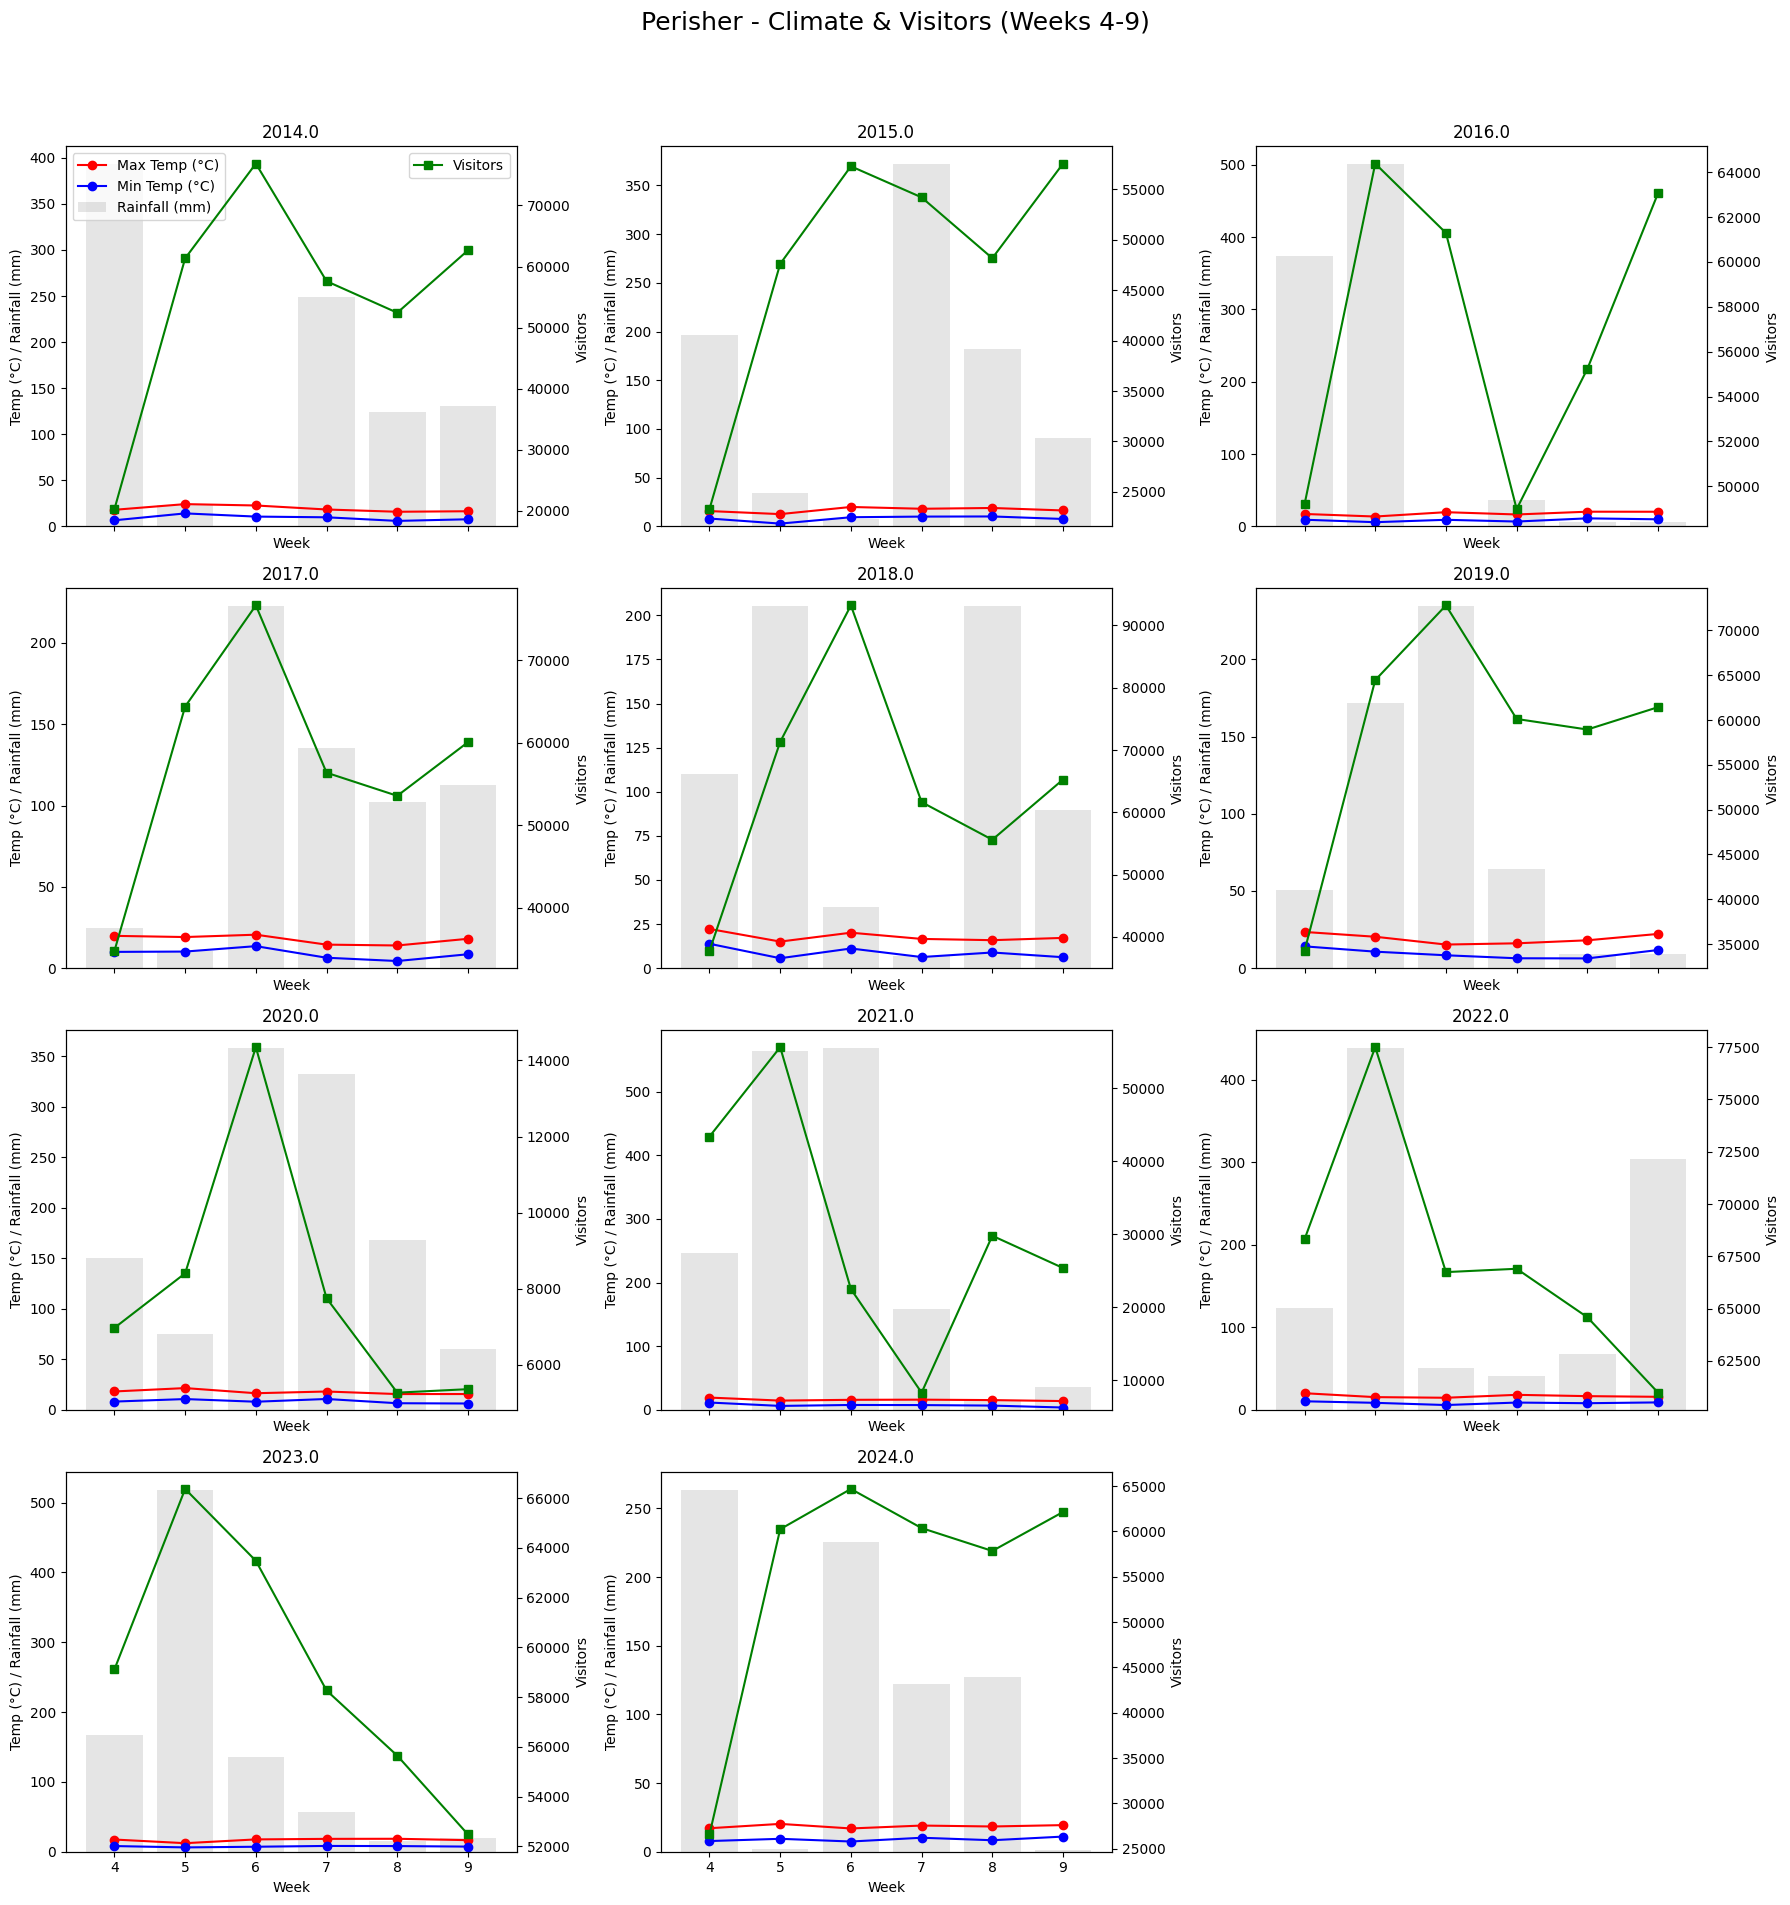

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load data
climate = pd.read_csv("/content/sample_data/Climate Data.csv")
visitation = pd.read_csv("/content/sample_data/Visitation Data.csv")

park = "Perisher"
weeks_of_interest = [4, 5, 6, 7, 8, 9]

# Get all years available for Perisher in visitation data
years = sorted(visitation["Year"].dropna().unique())
n_years = len(years)
n_cols = 3
n_rows = math.ceil(n_years / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5), sharex=True)

for idx, year in enumerate(years):
    row = idx // n_cols
    col = idx % n_cols
    ax1 = axes[row, col] if n_rows > 1 else axes[col]

    # Prepare visitation data
    vis = visitation[(visitation["Year"] == year) & (visitation["Week"].isin(weeks_of_interest))]

    # Prepare climate data
    climate_year = climate[climate["Year"] == year].copy()
    if climate_year.empty:
        continue
    climate_year["Date"] = pd.to_datetime(dict(year=climate_year["Year"], month=climate_year["Month"], day=climate_year["Day"]))
    climate_year["DayOfYear"] = climate_year["Date"].dt.dayofyear
    climate_year["Week"] = ((climate_year["DayOfYear"] - 1) // 7) + 1

    weekly_climate = climate_year.groupby("Week").agg({
        "Maximum temperature (Degree C)": "mean",
        "Minimum temperature (Degree C)": "mean",
        "Rainfall amount (millimetres)": "sum"
    }).reset_index()

    climate_plot = weekly_climate[weekly_climate["Week"].isin(weeks_of_interest)]

    # Climate data
    ax1.plot(climate_plot["Week"], climate_plot["Maximum temperature (Degree C)"], 'r-o', label="Max Temp (°C)")
    ax1.plot(climate_plot["Week"], climate_plot["Minimum temperature (Degree C)"], 'b-o', label="Min Temp (°C)")
    ax1.bar(climate_plot["Week"], climate_plot["Rainfall amount (millimetres)"], alpha=0.2, color='gray', label="Rainfall (mm)")
    ax1.set_xlabel("Week")
    ax1.set_ylabel("Temp (°C) / Rainfall (mm)")
    ax1.set_title(f"{year}")

    # Visitors on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(vis["Week"], vis[park], 'g-s', label="Visitors")
    ax2.set_ylabel("Visitors")

    # Legends (only for the first subplot)
    if idx == 0:
        ax1.legend(loc="upper left")
        ax2.legend(loc="upper right")

# Hide unused subplots
for idx in range(len(years), n_rows * n_cols):
    fig.delaxes(axes.flatten()[idx])

fig.suptitle(f"{park} - Climate & Visitors (Weeks {weeks_of_interest[0]}-{weeks_of_interest[-1]})", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

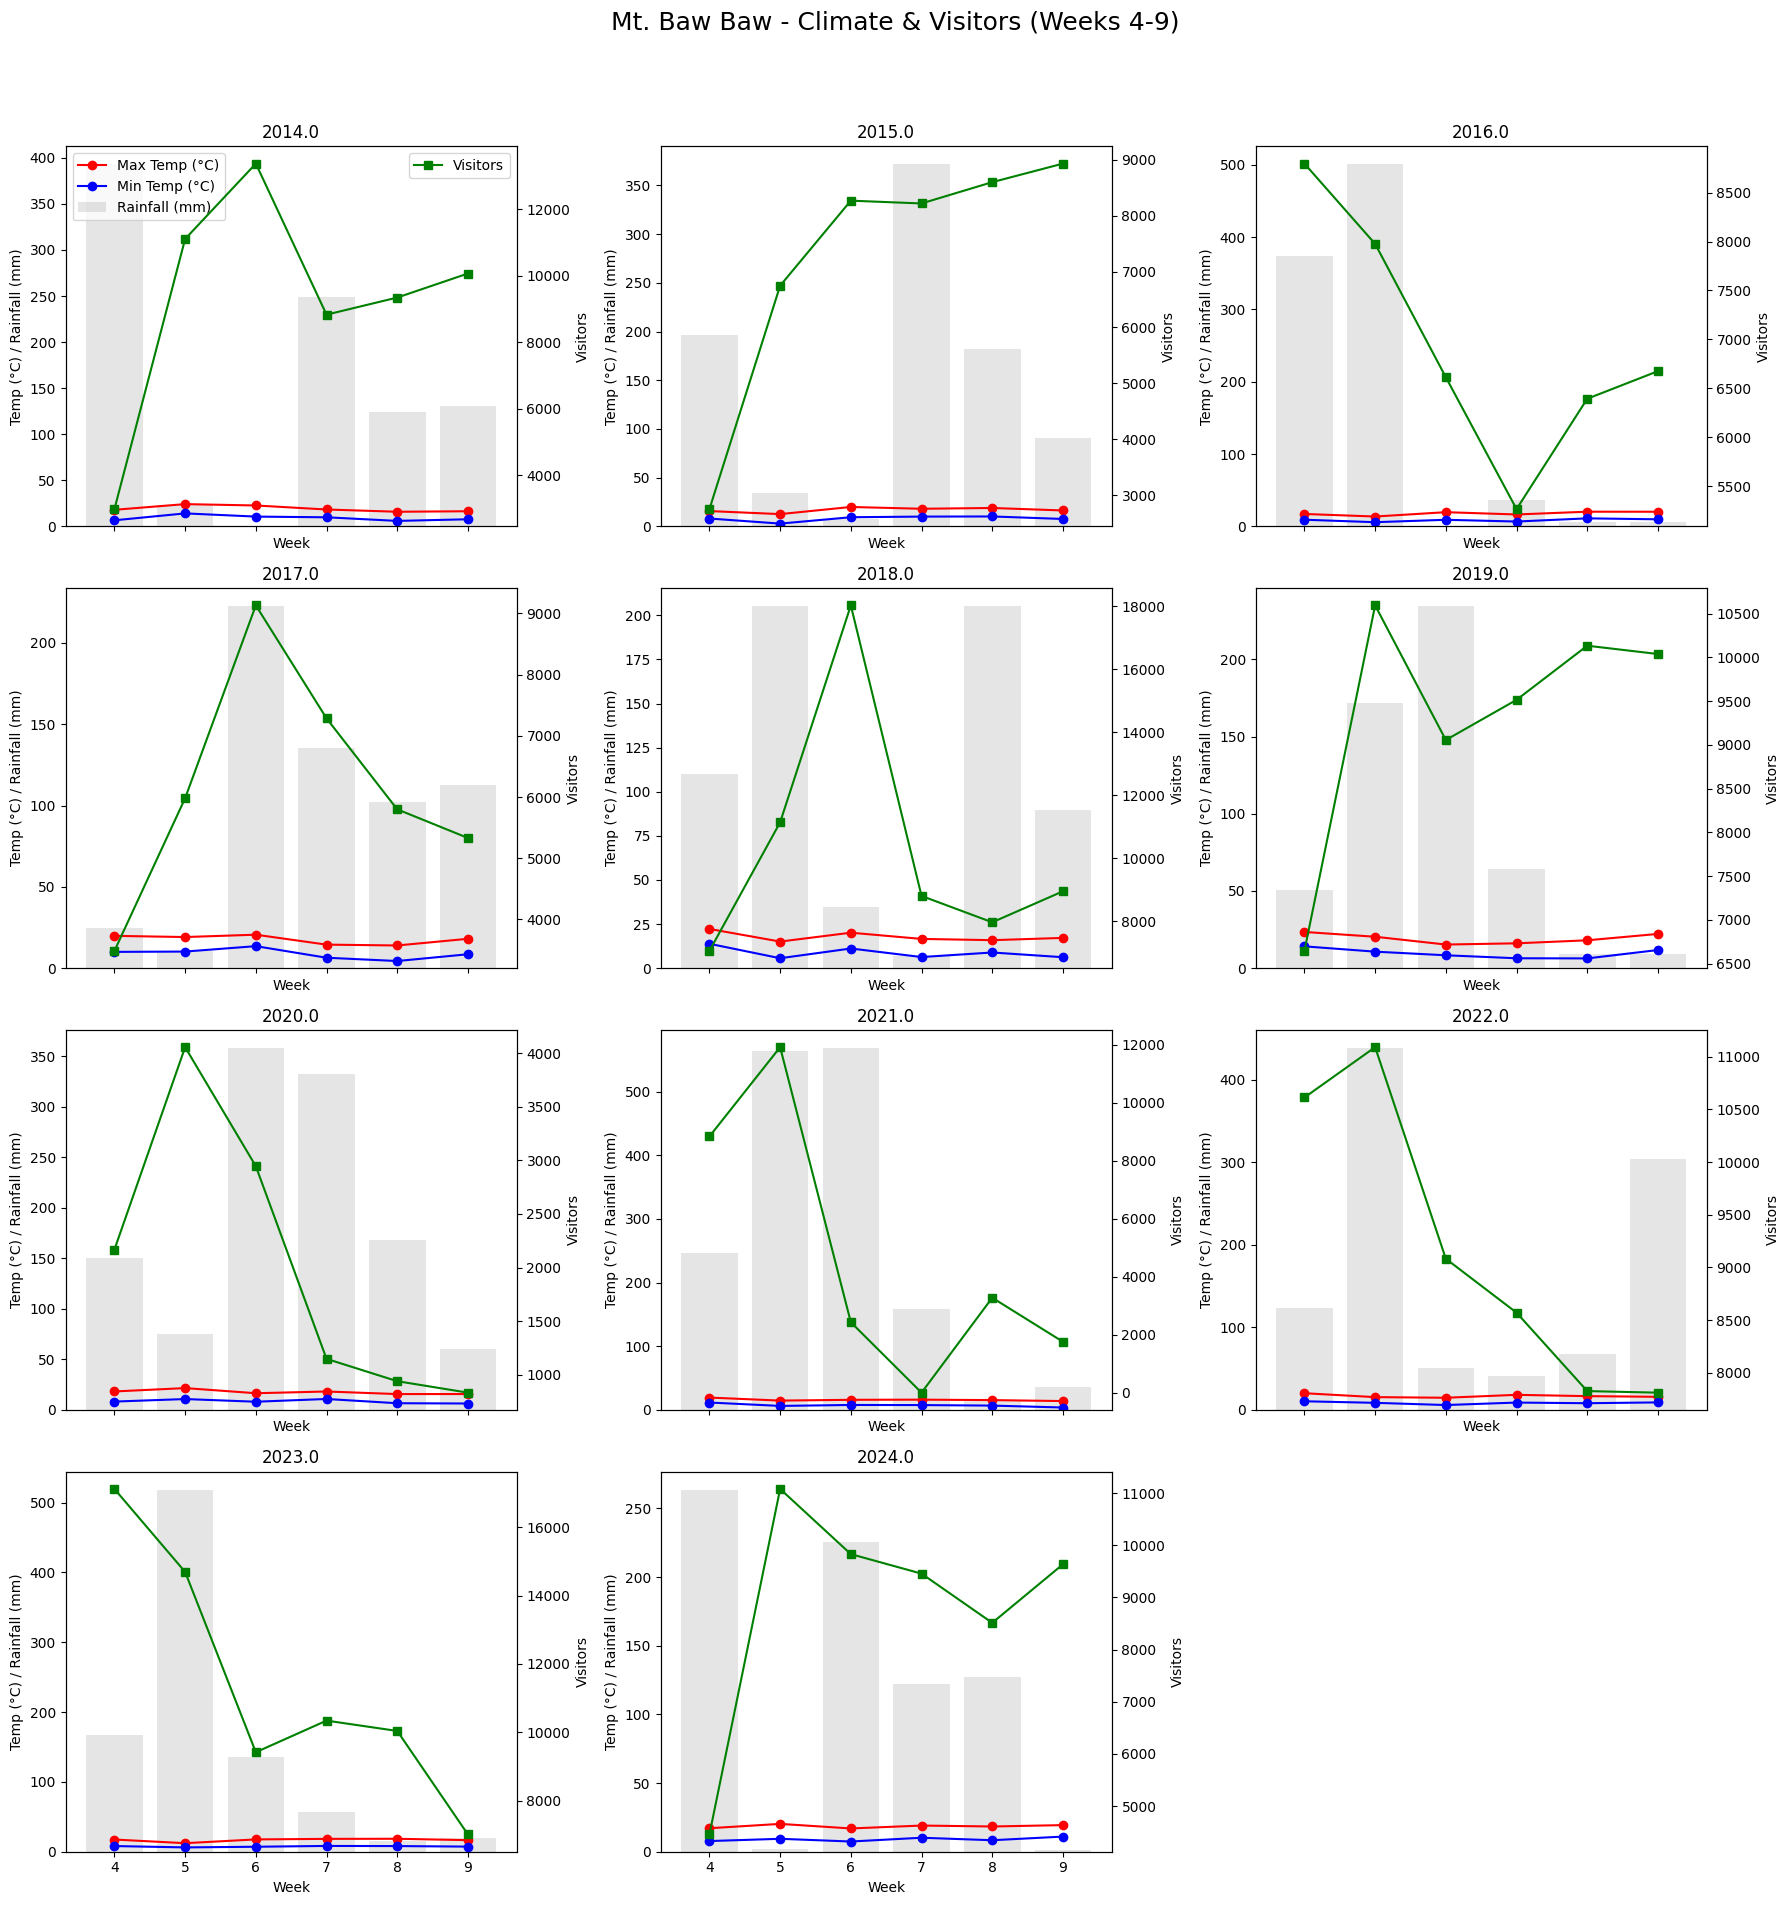

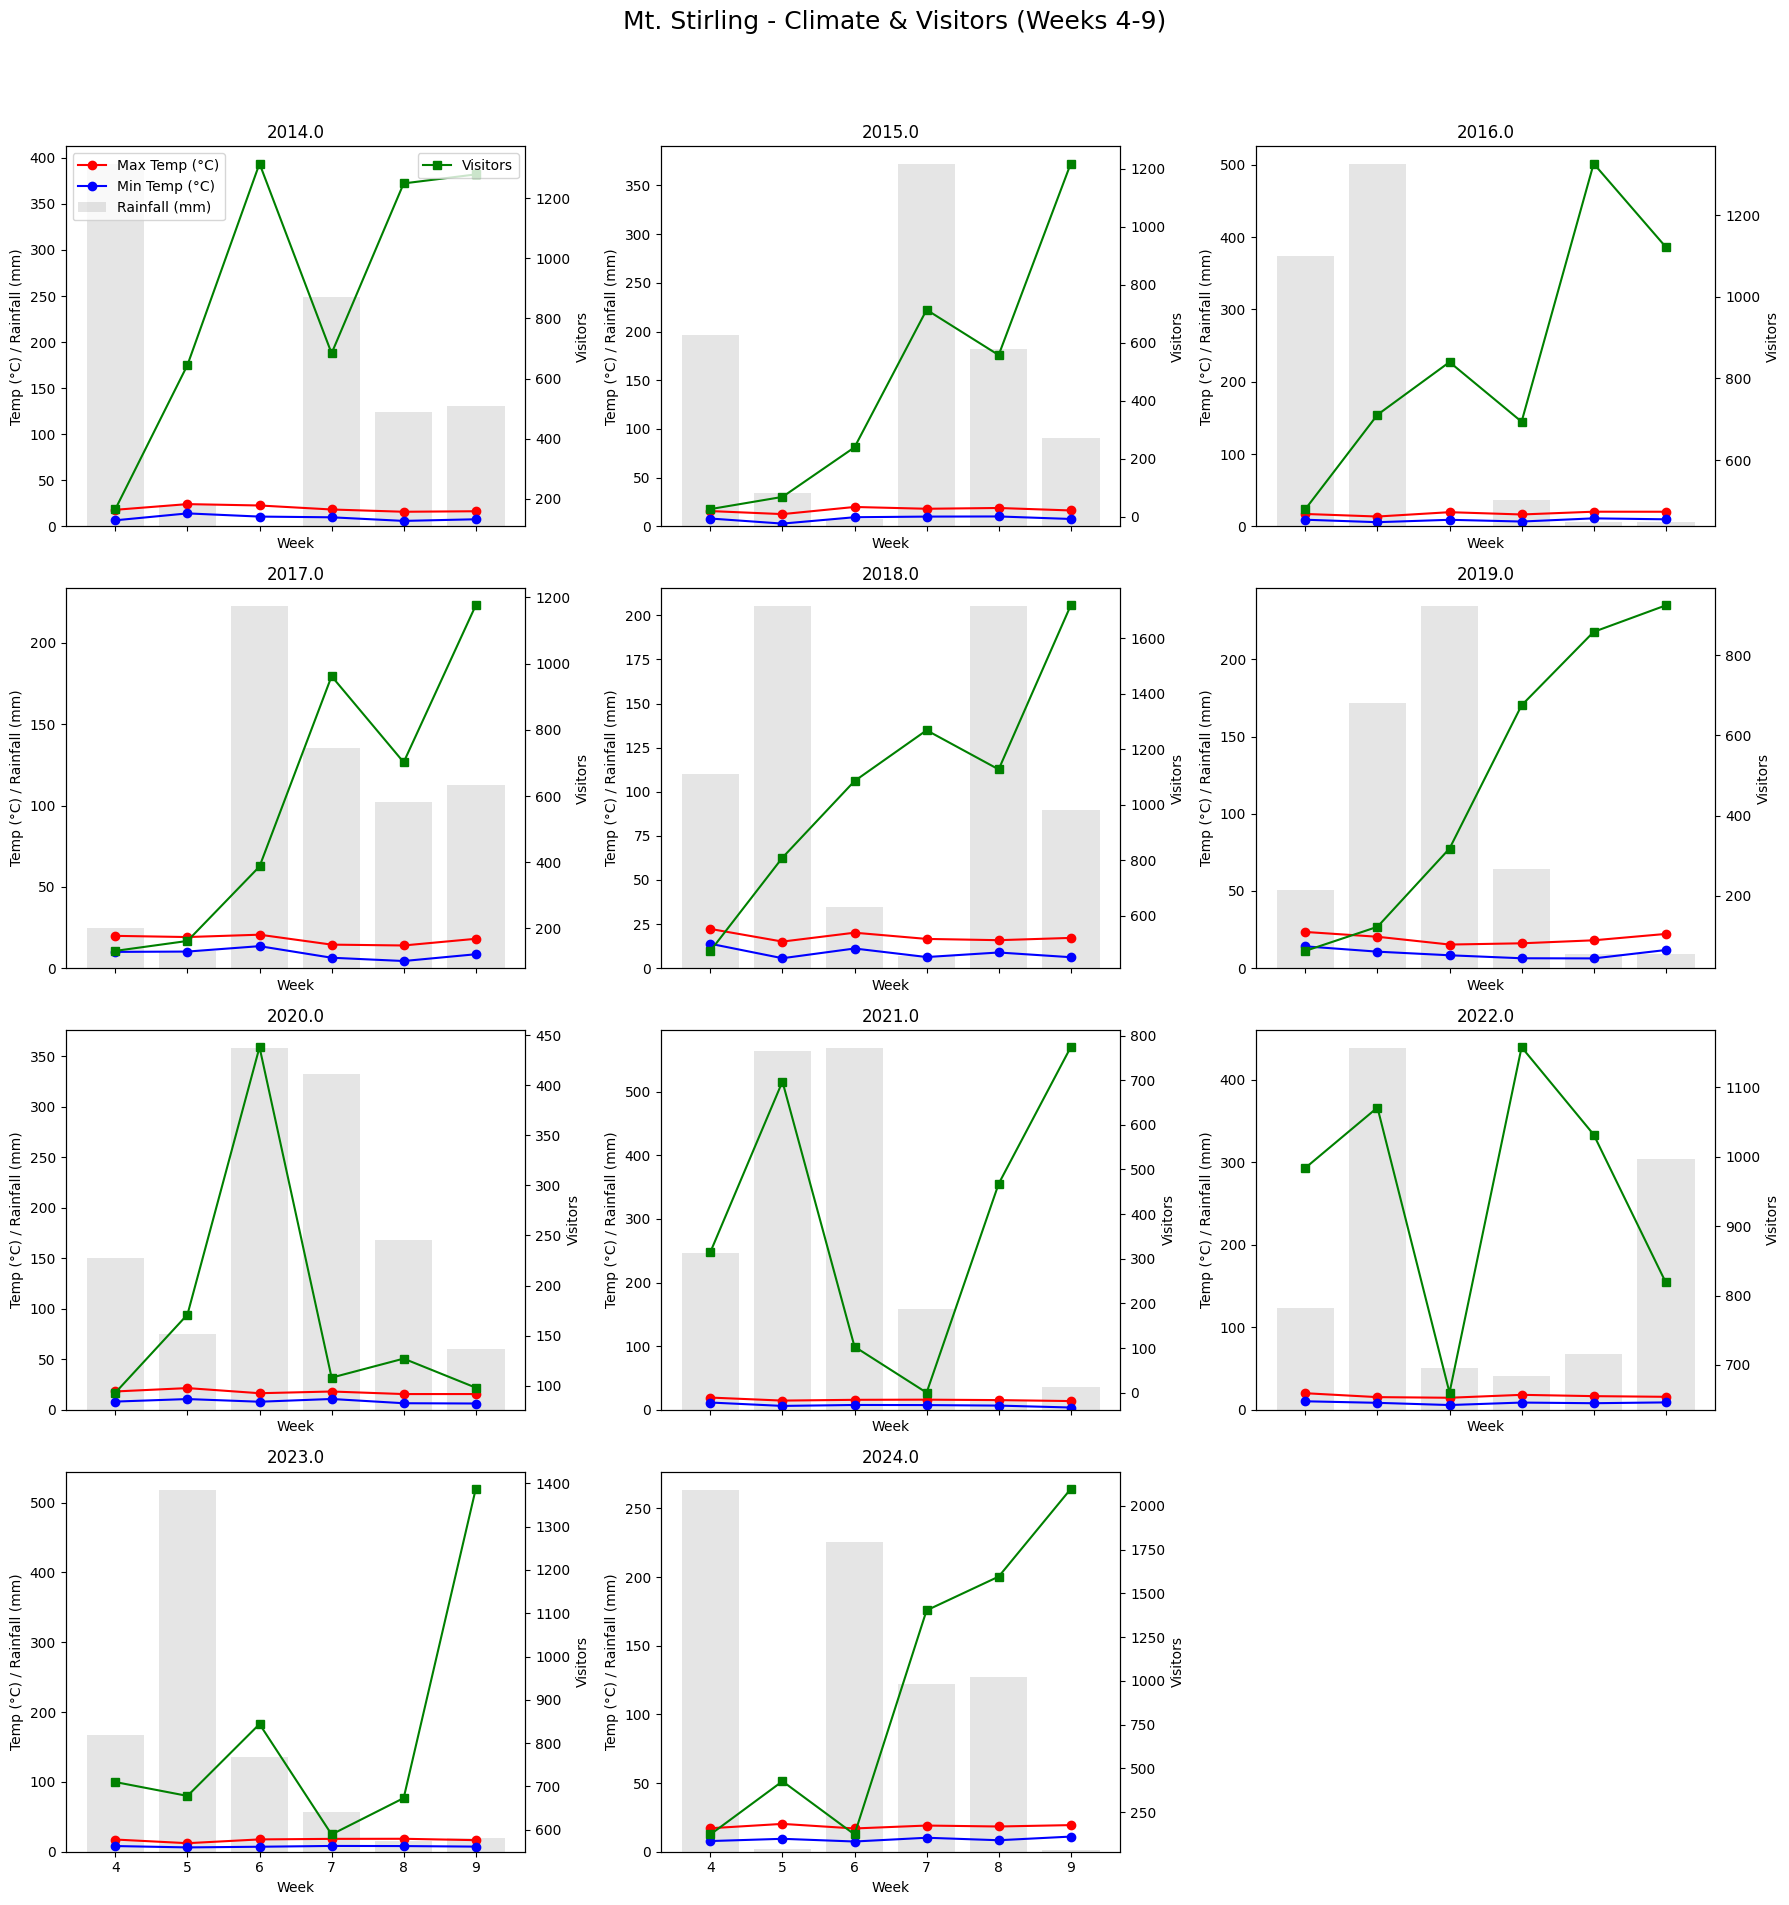

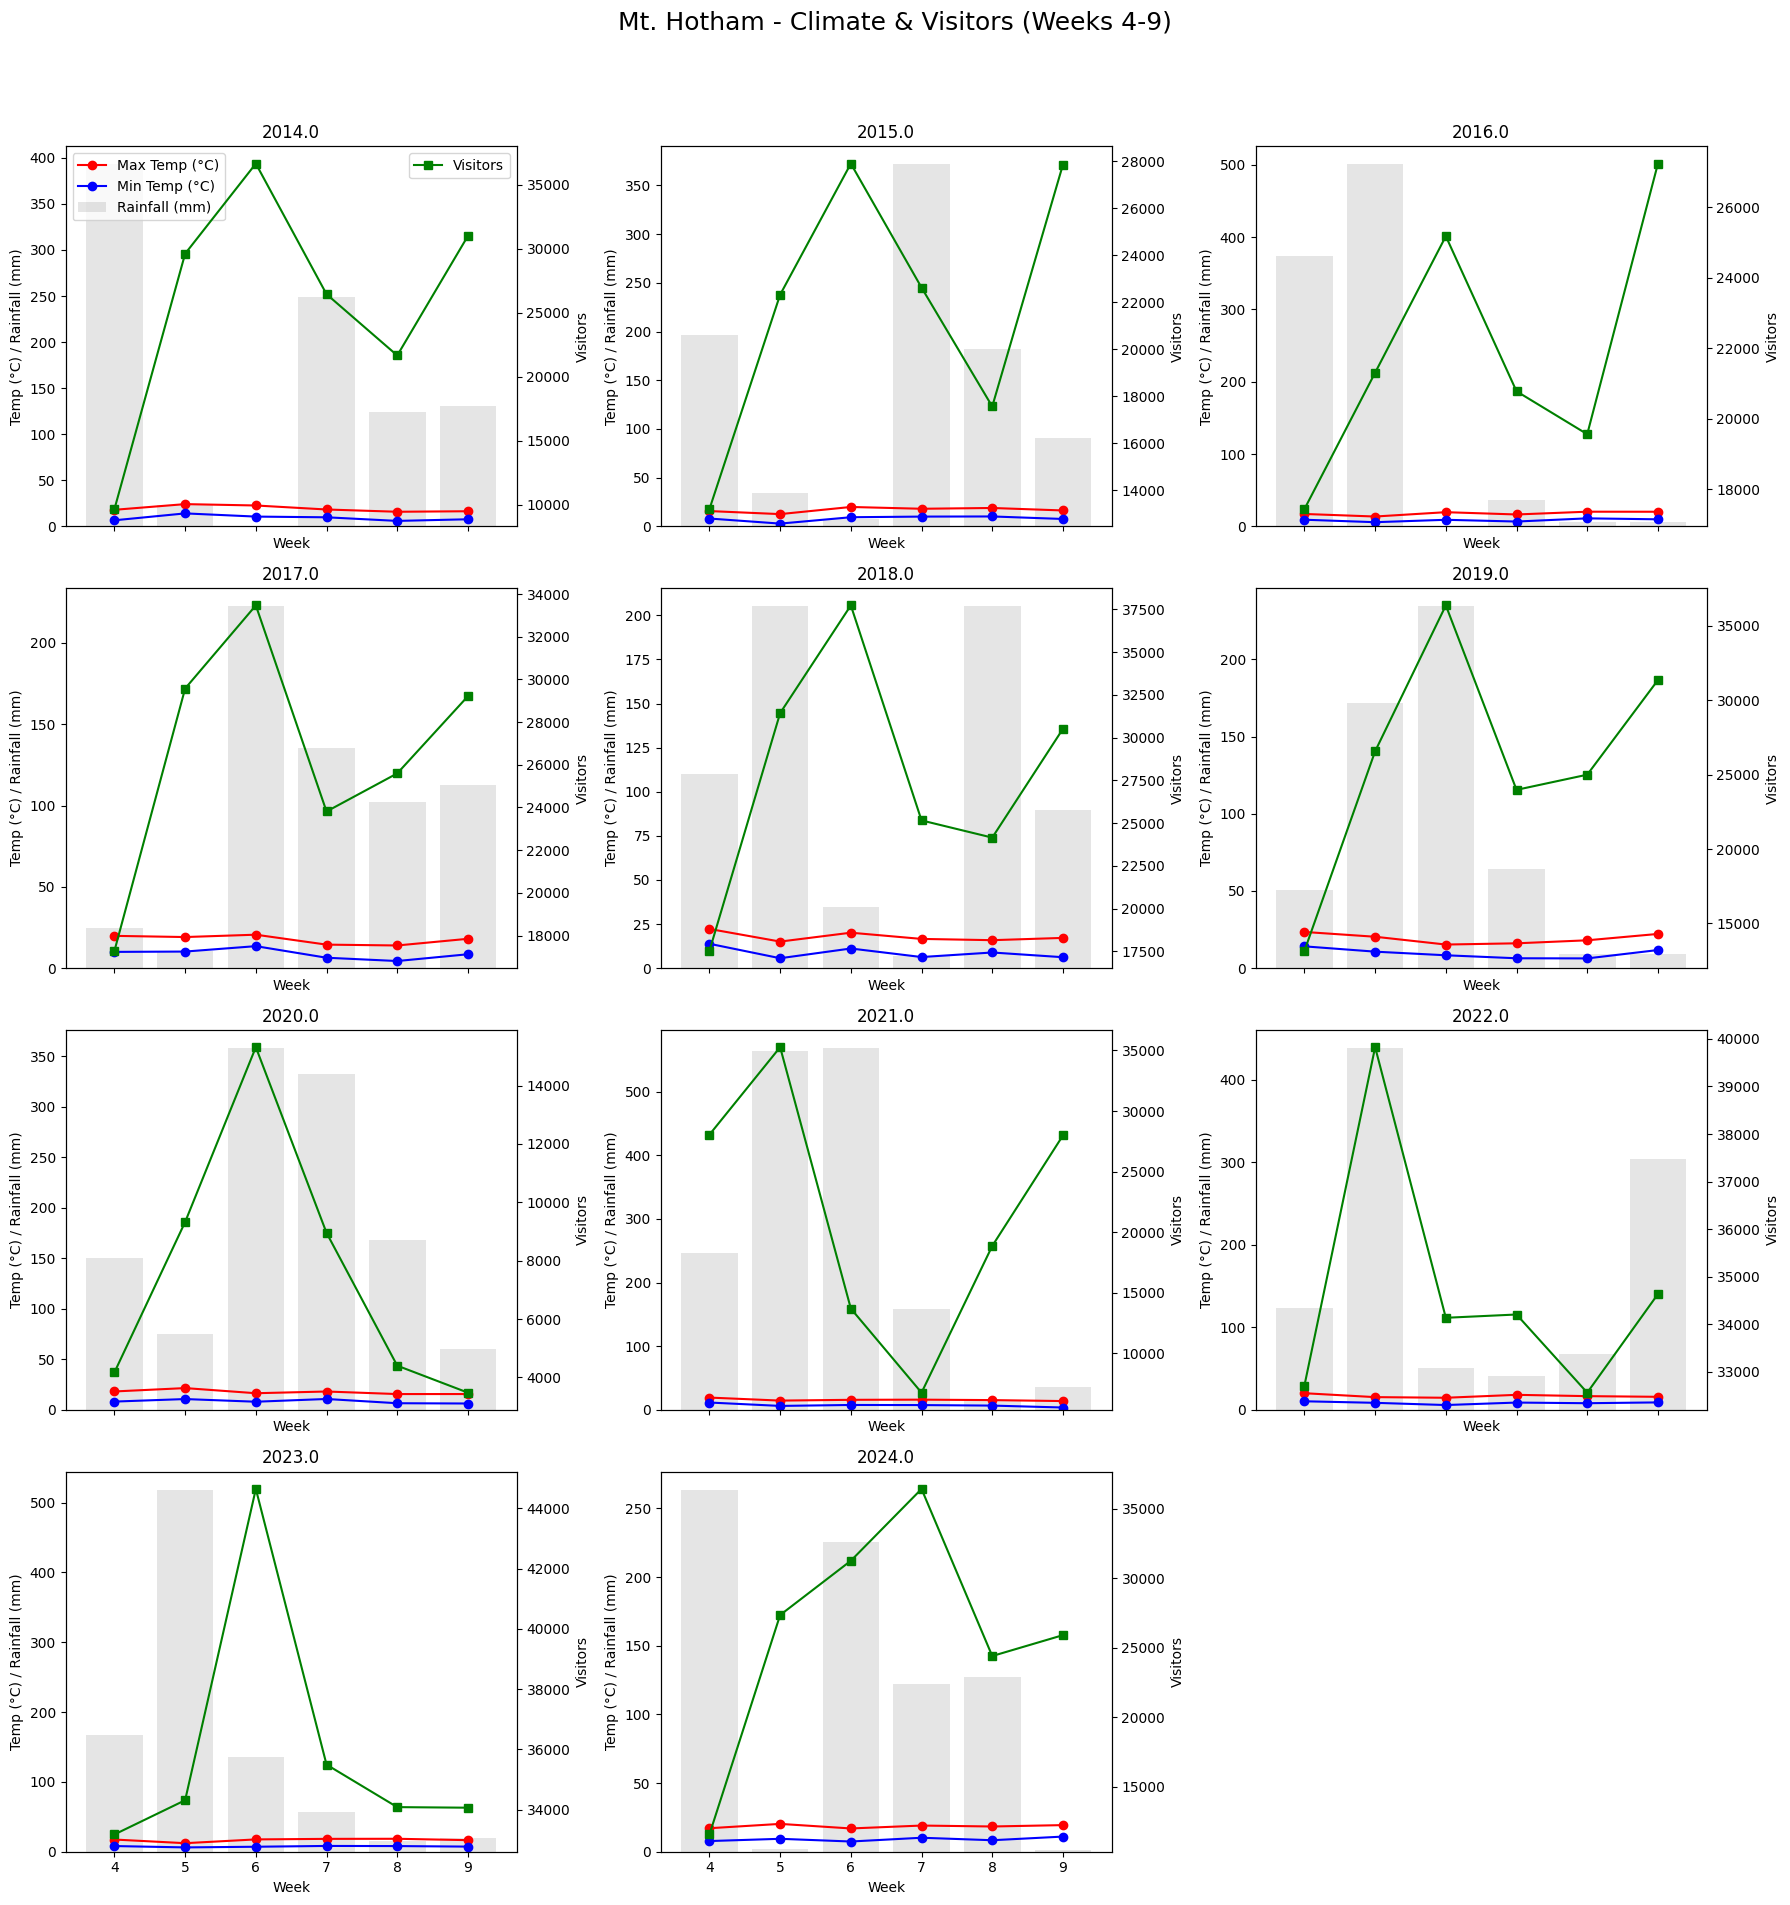

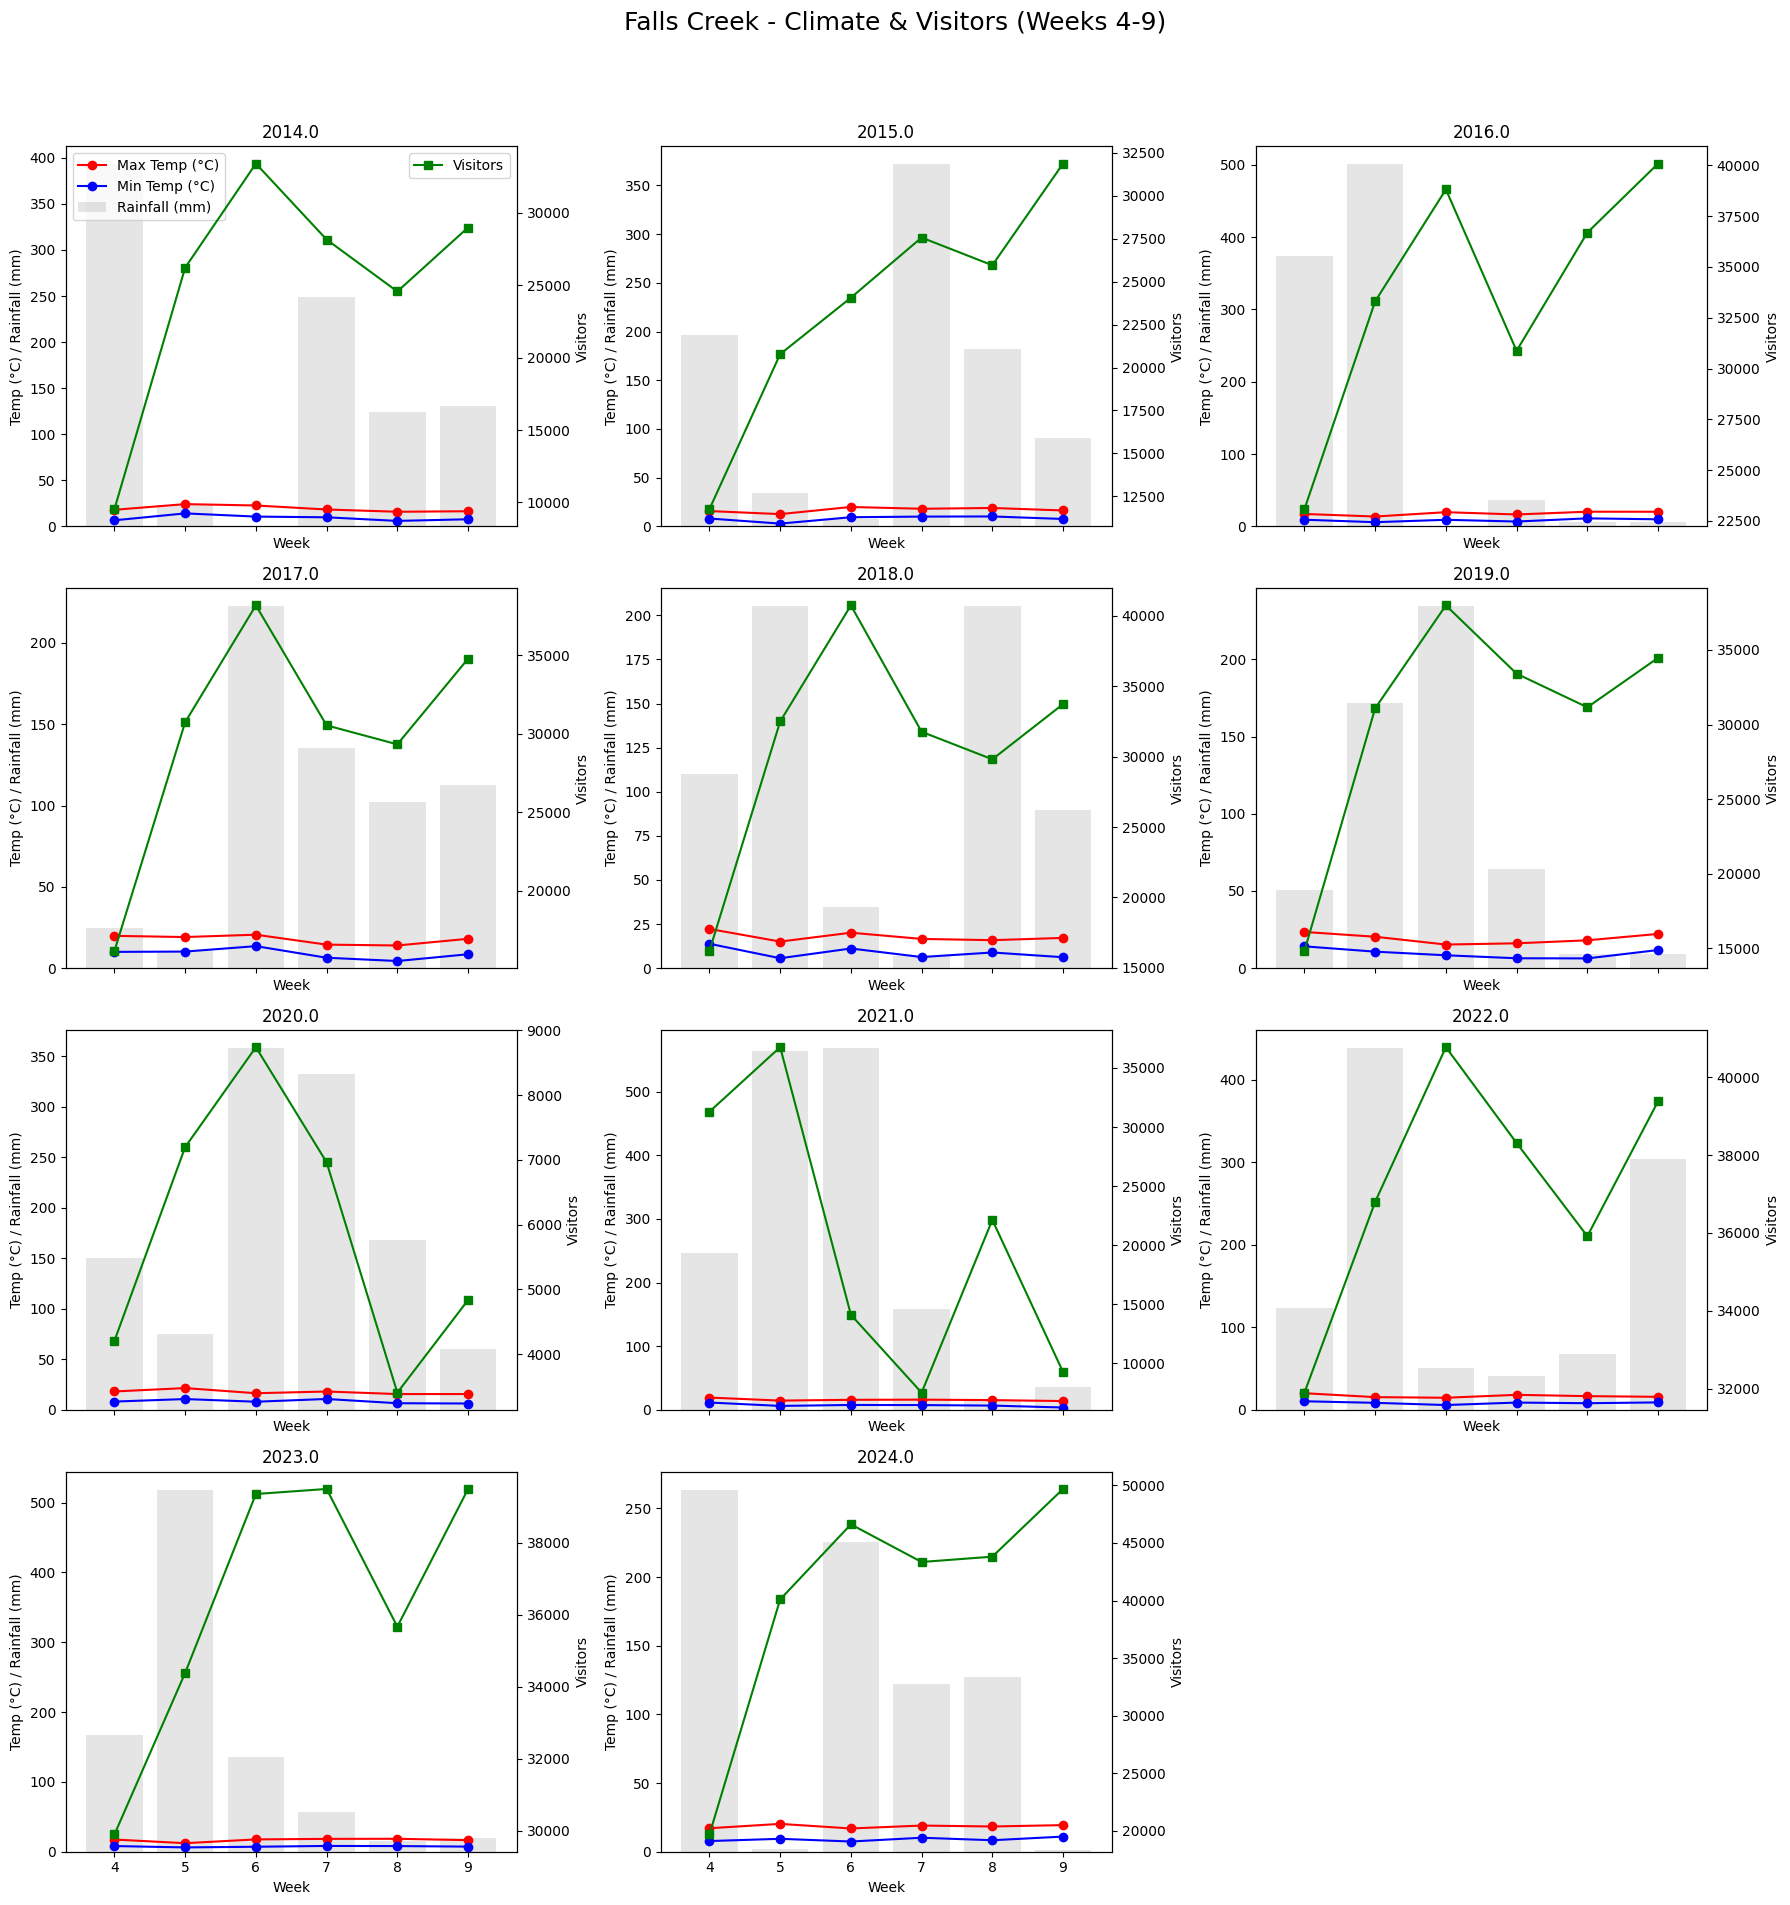

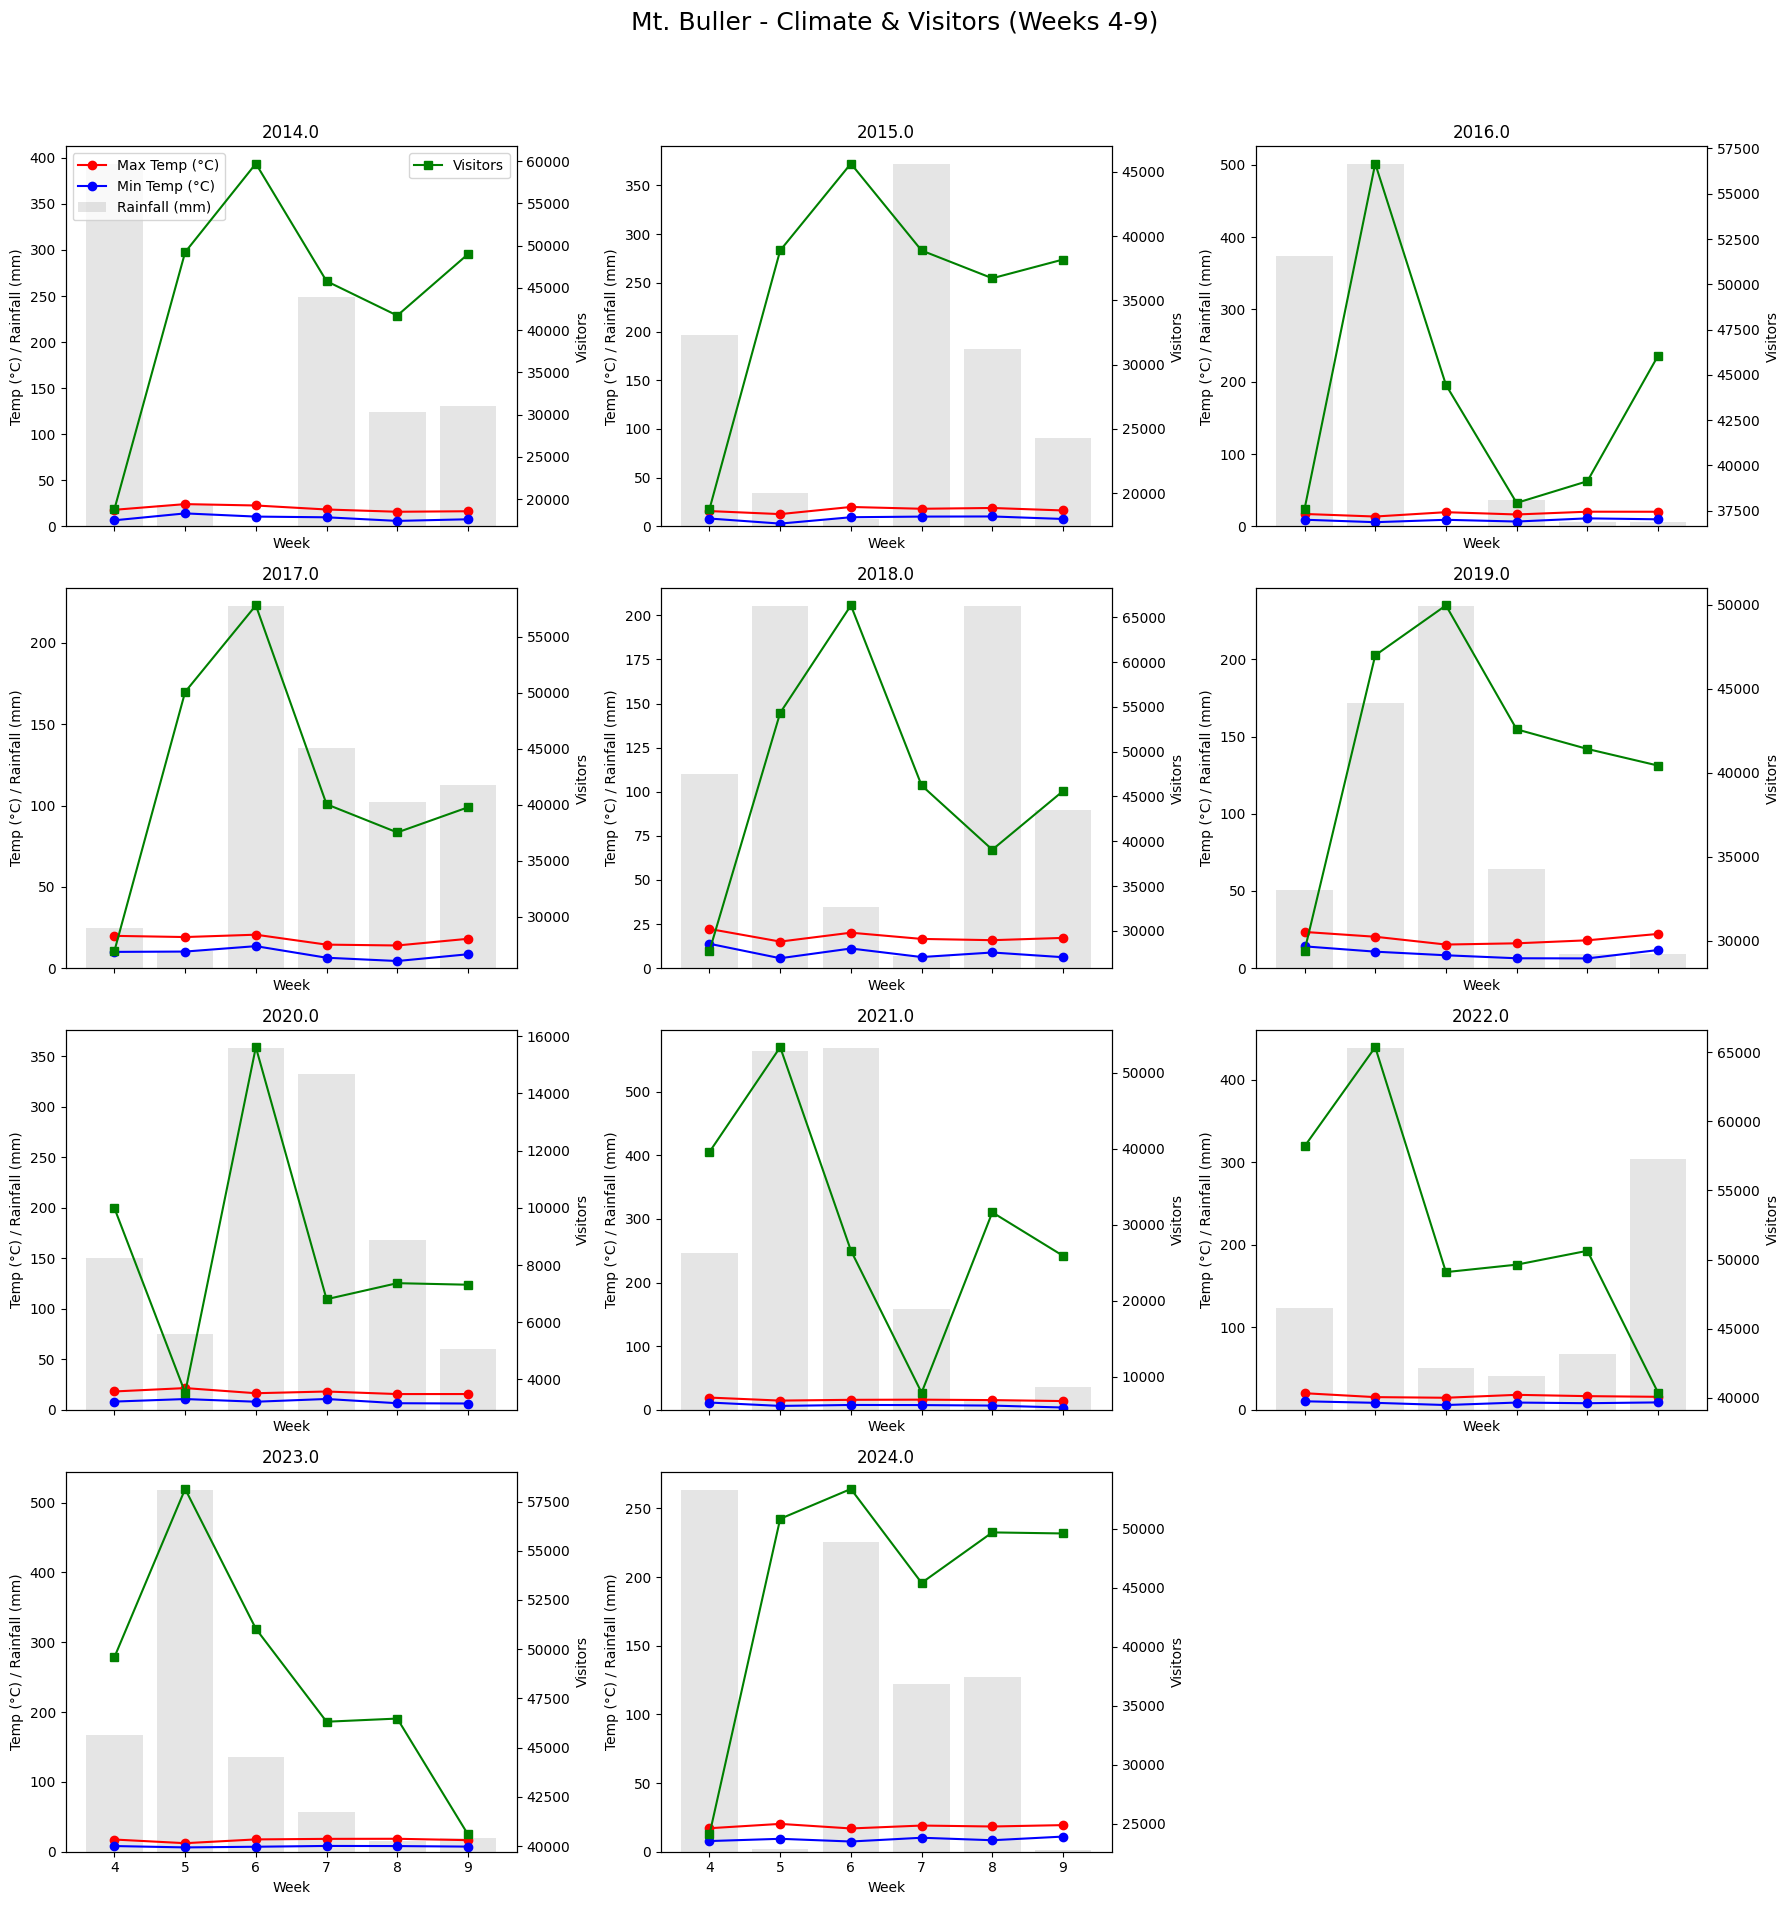

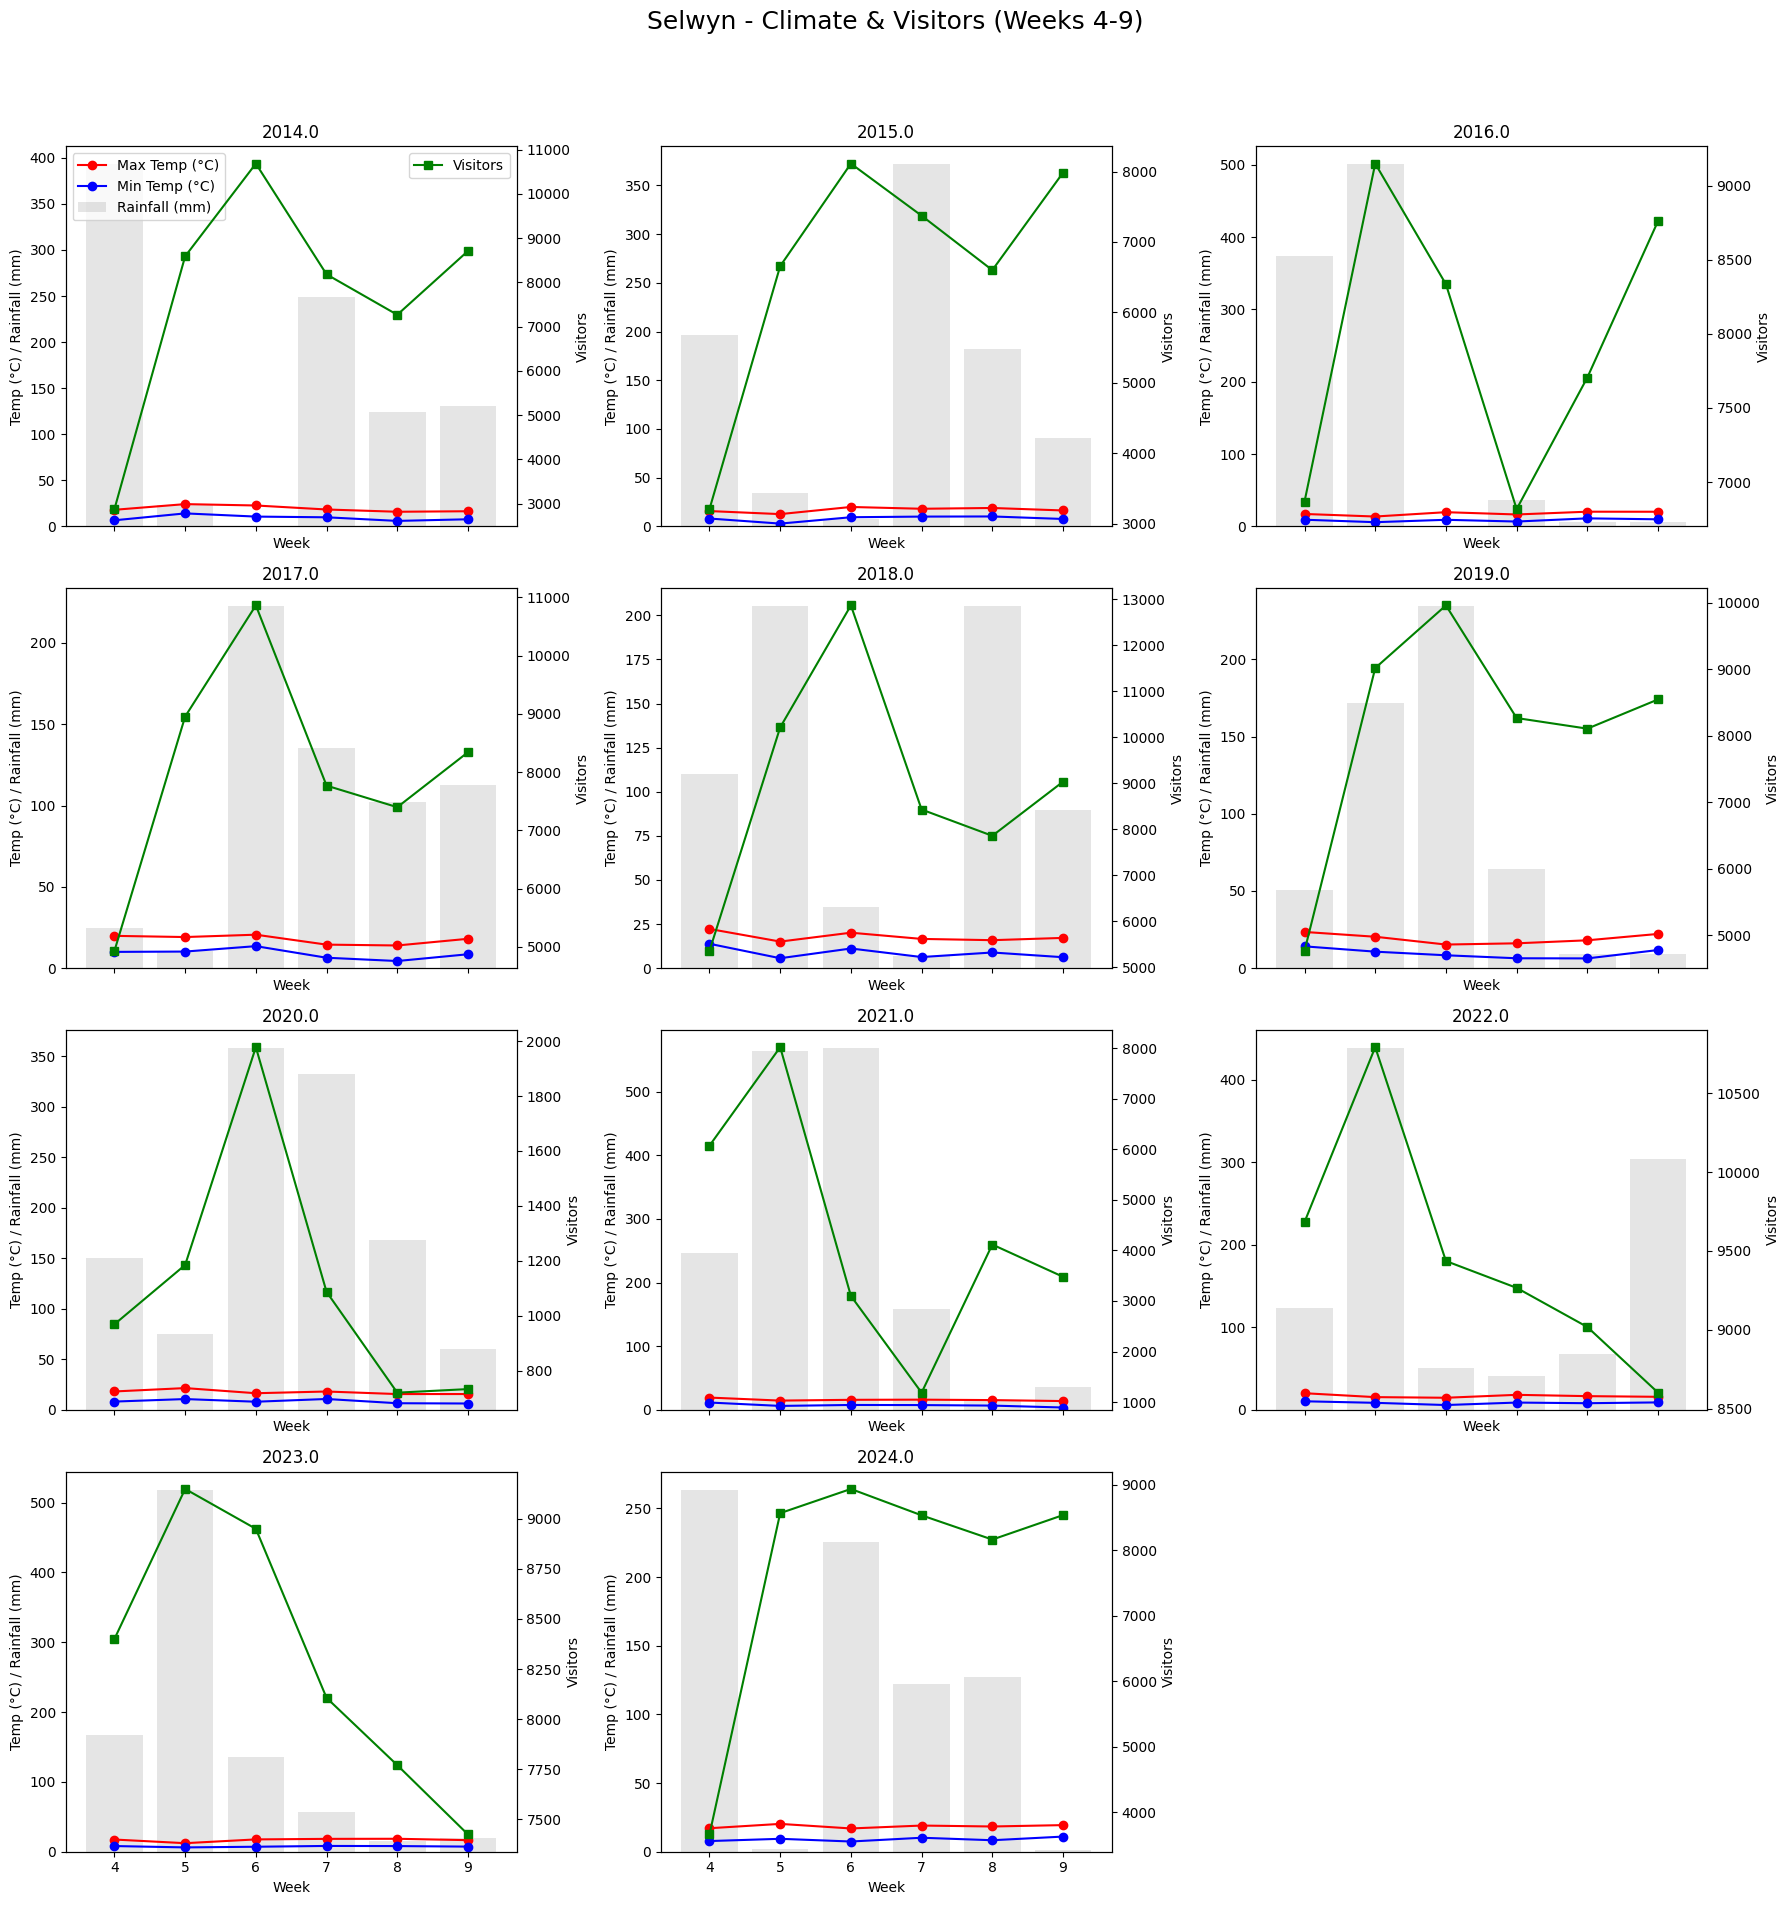

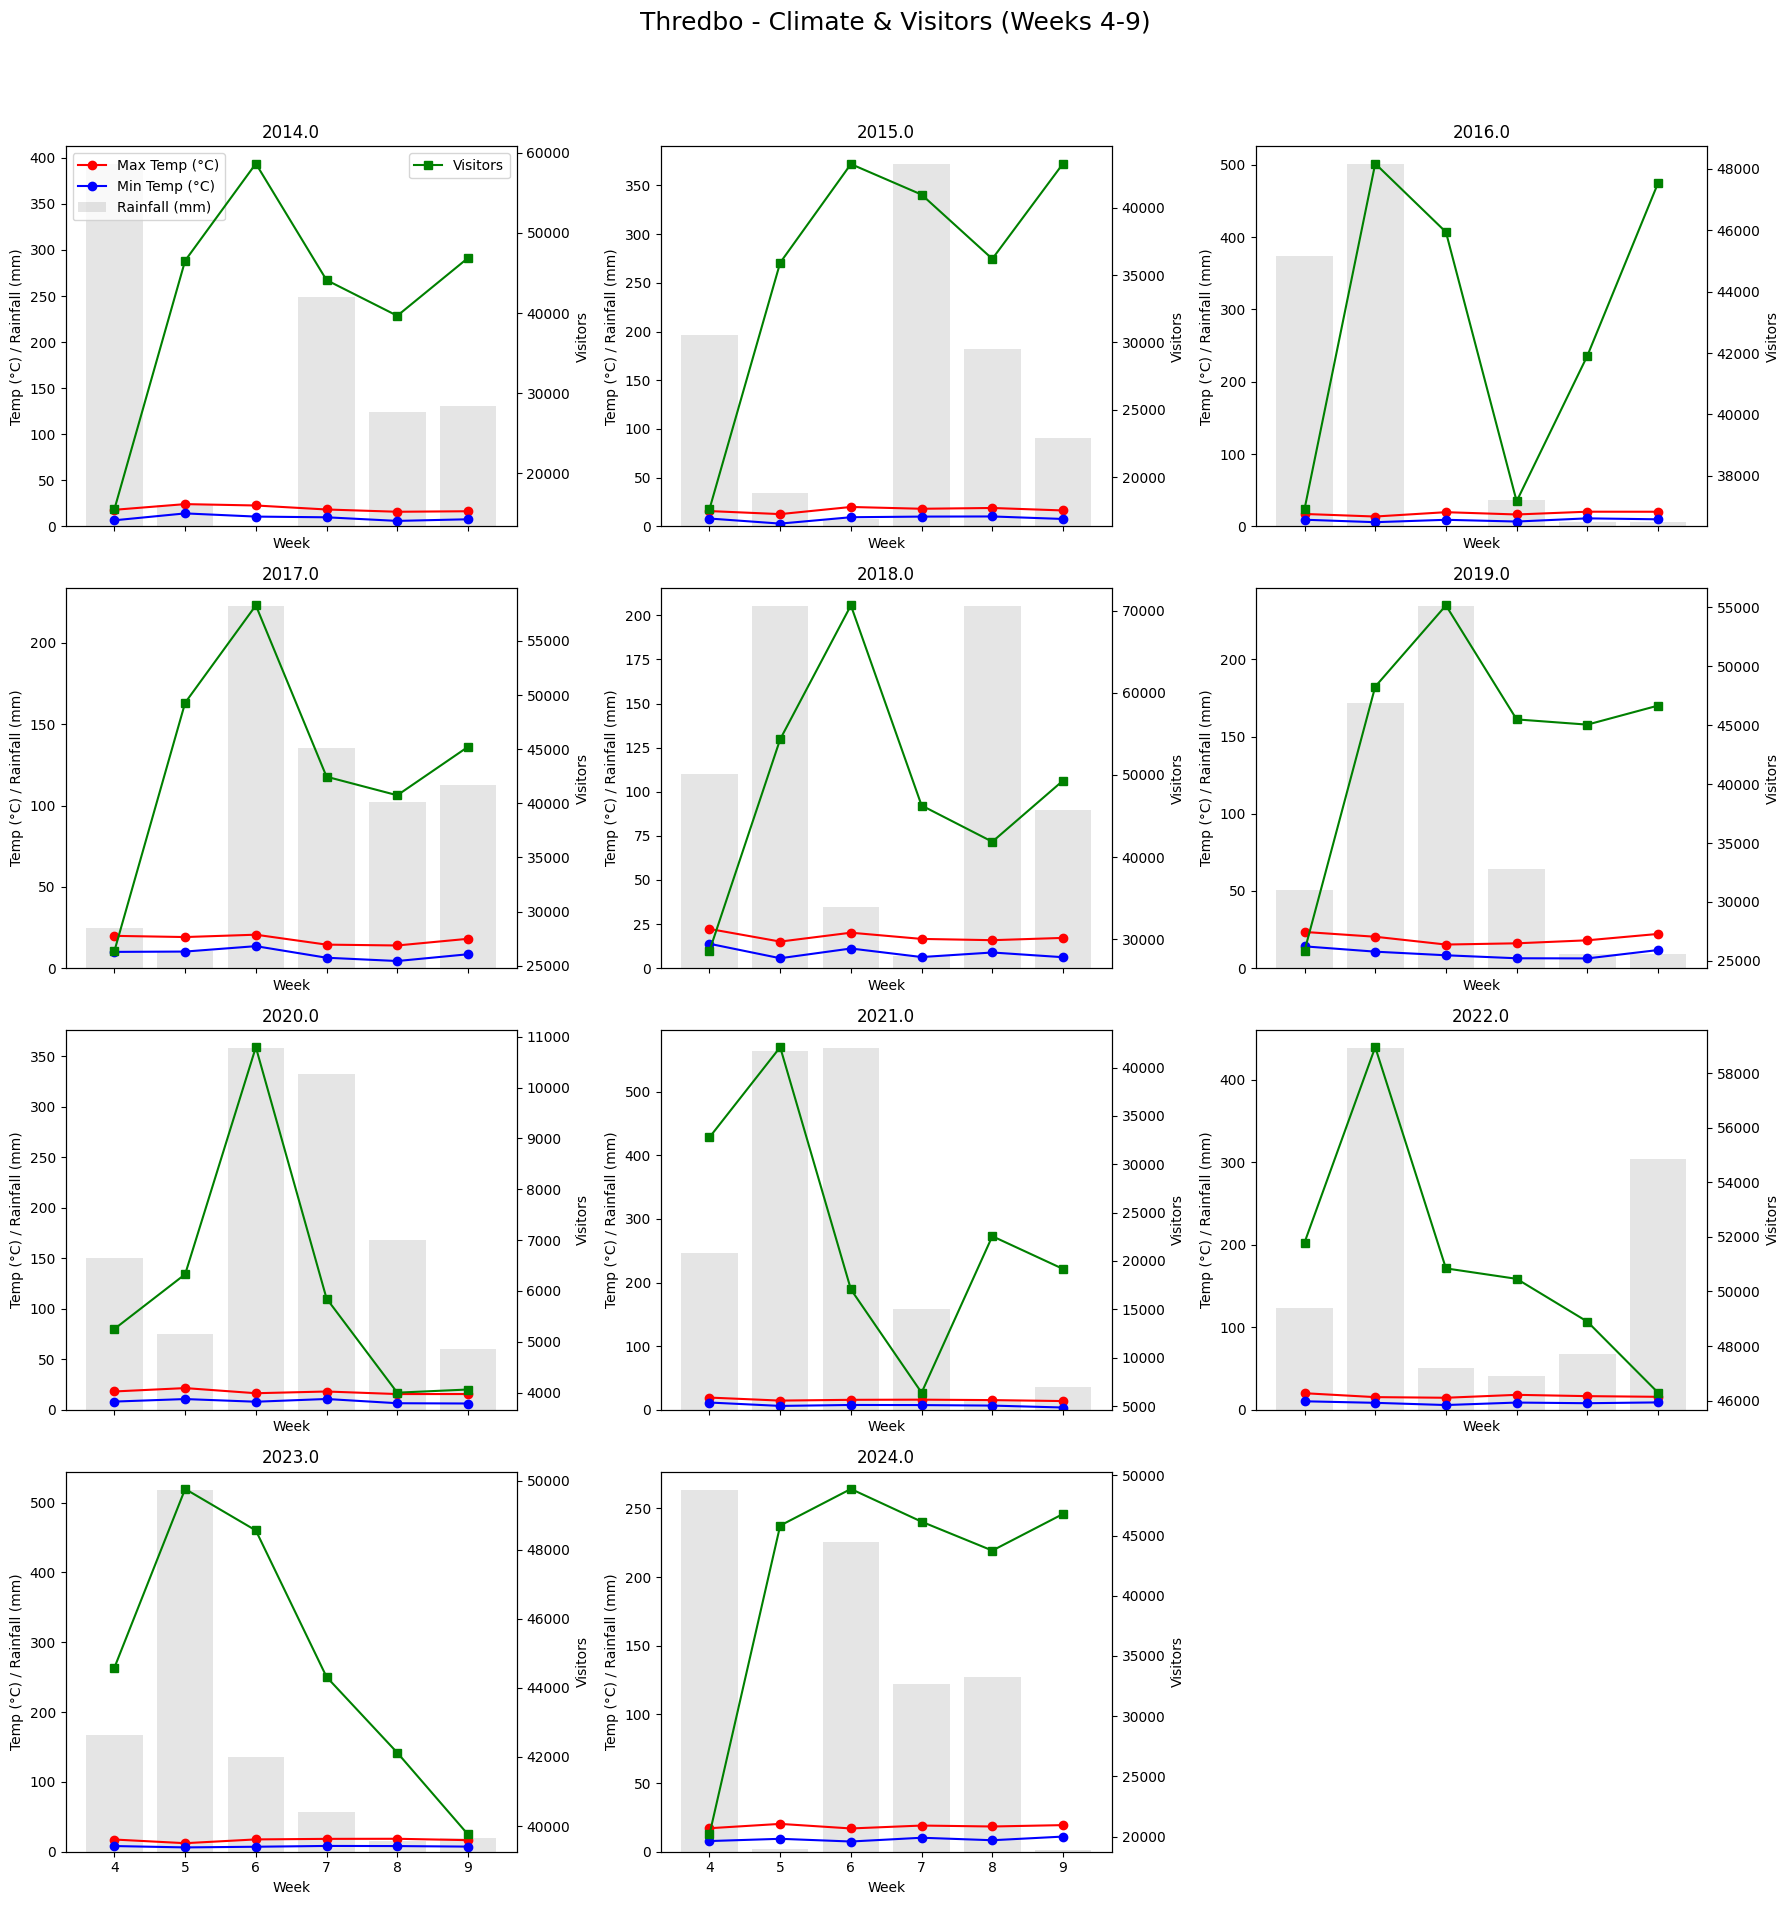

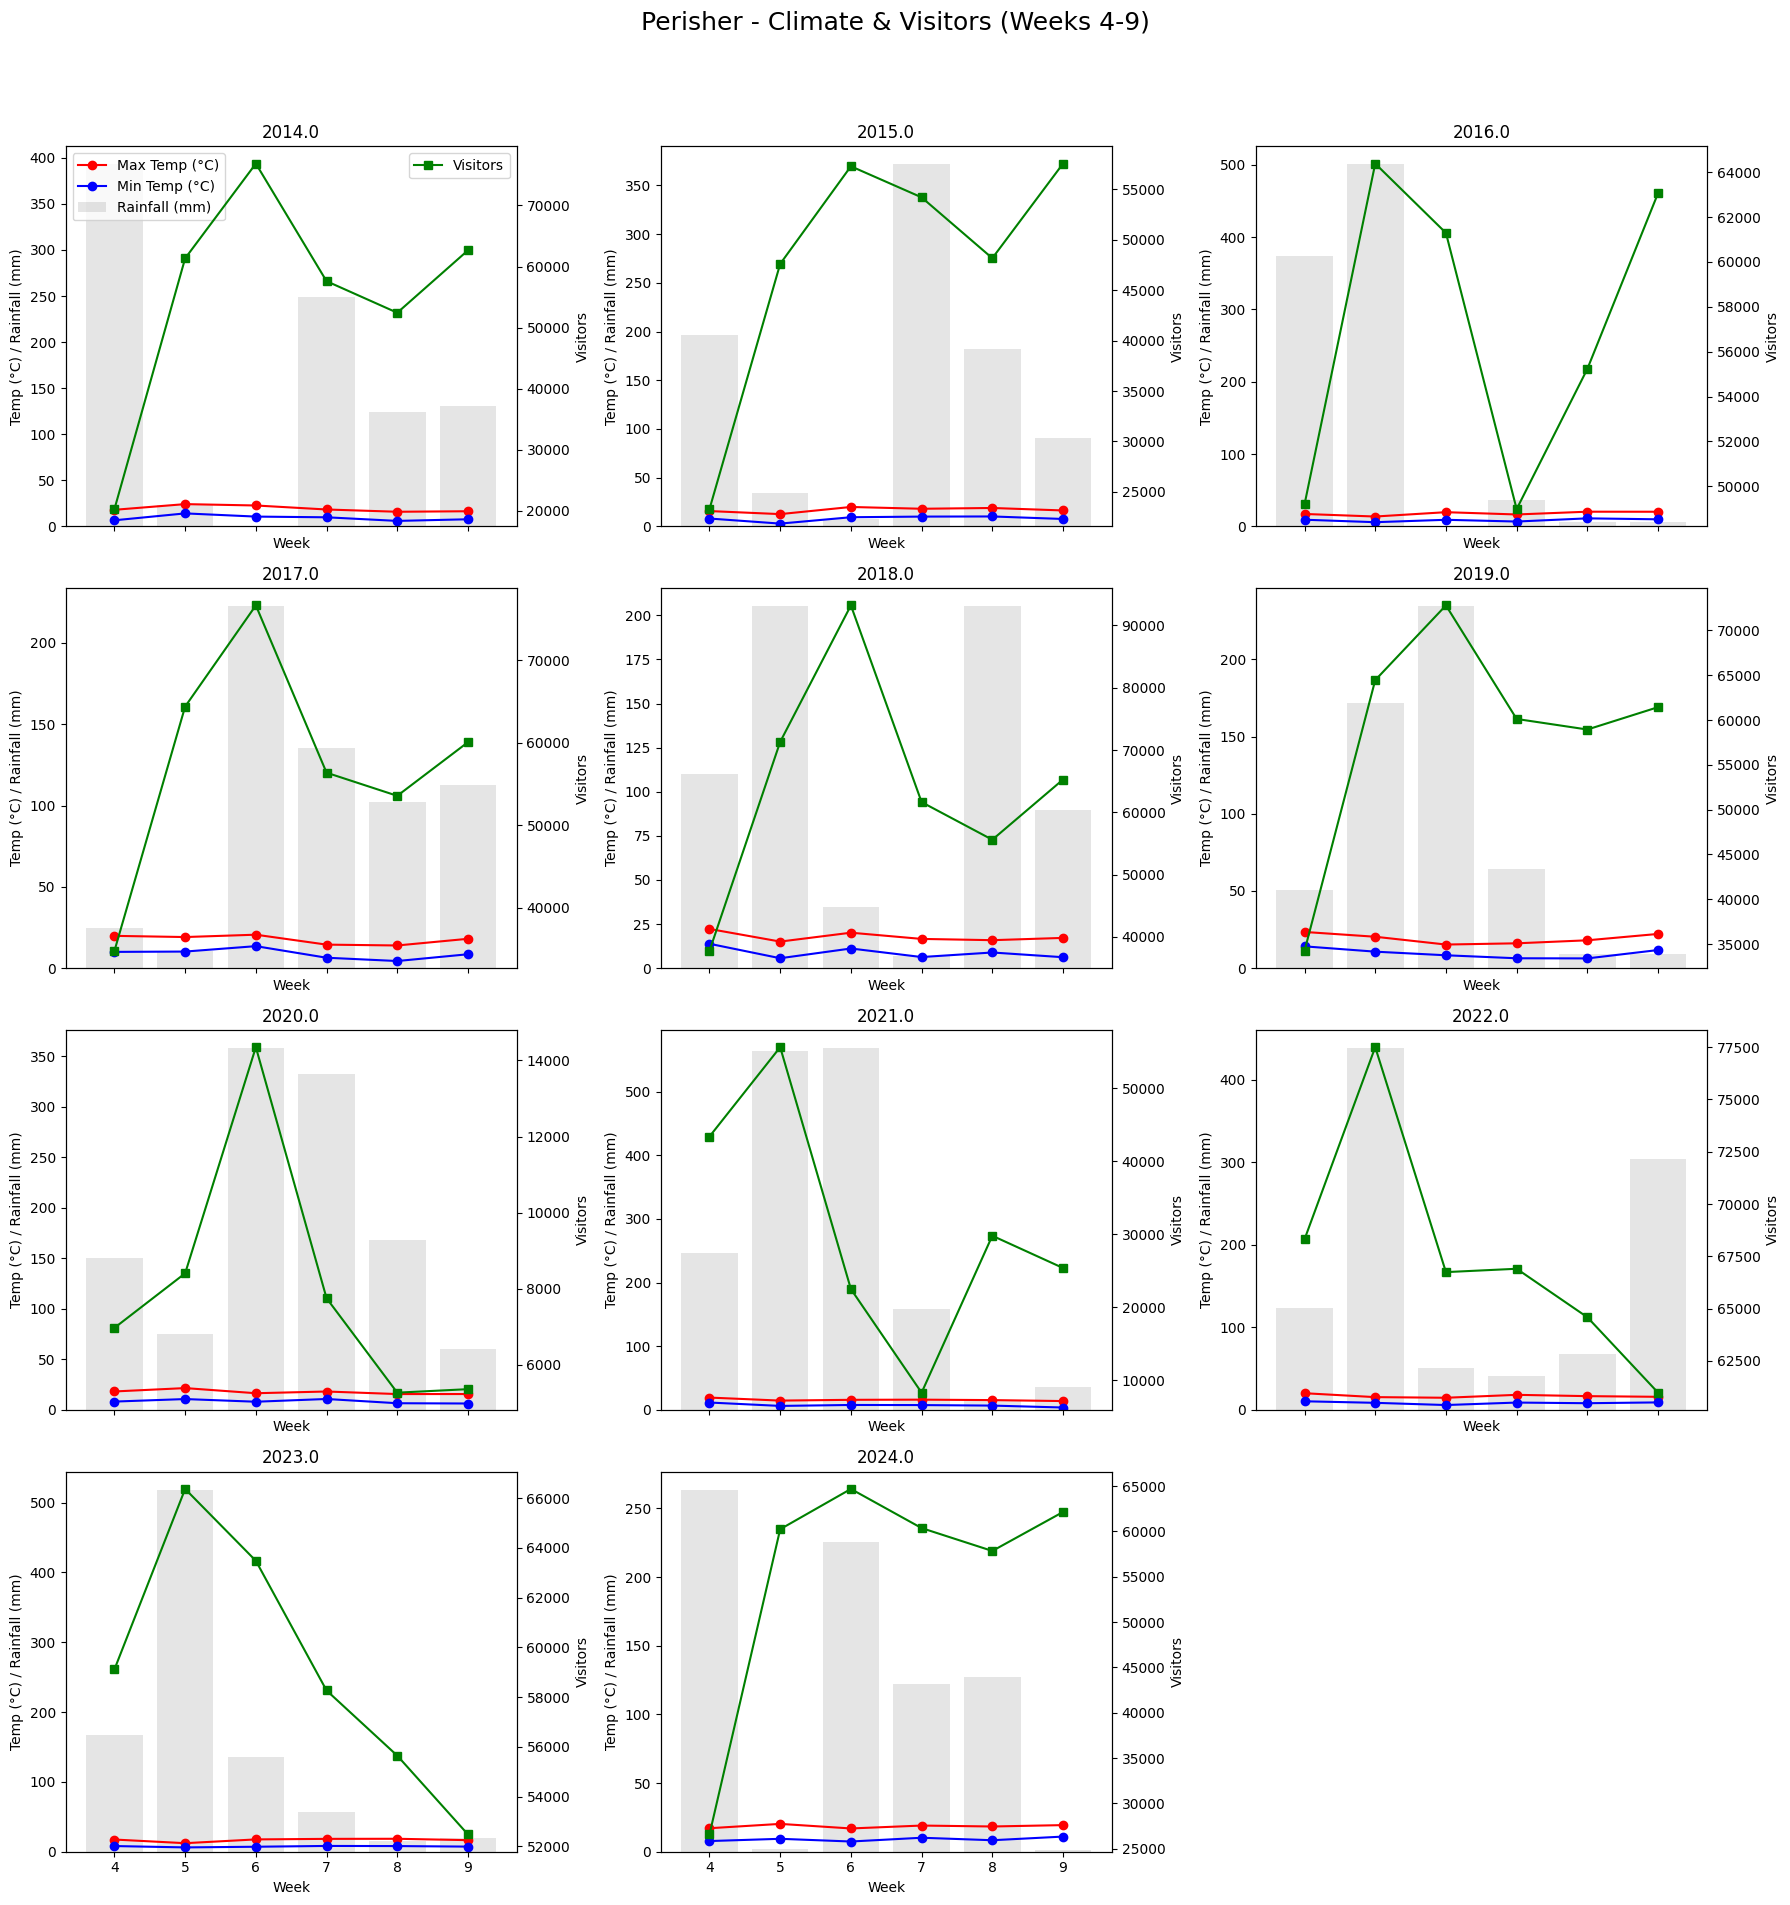

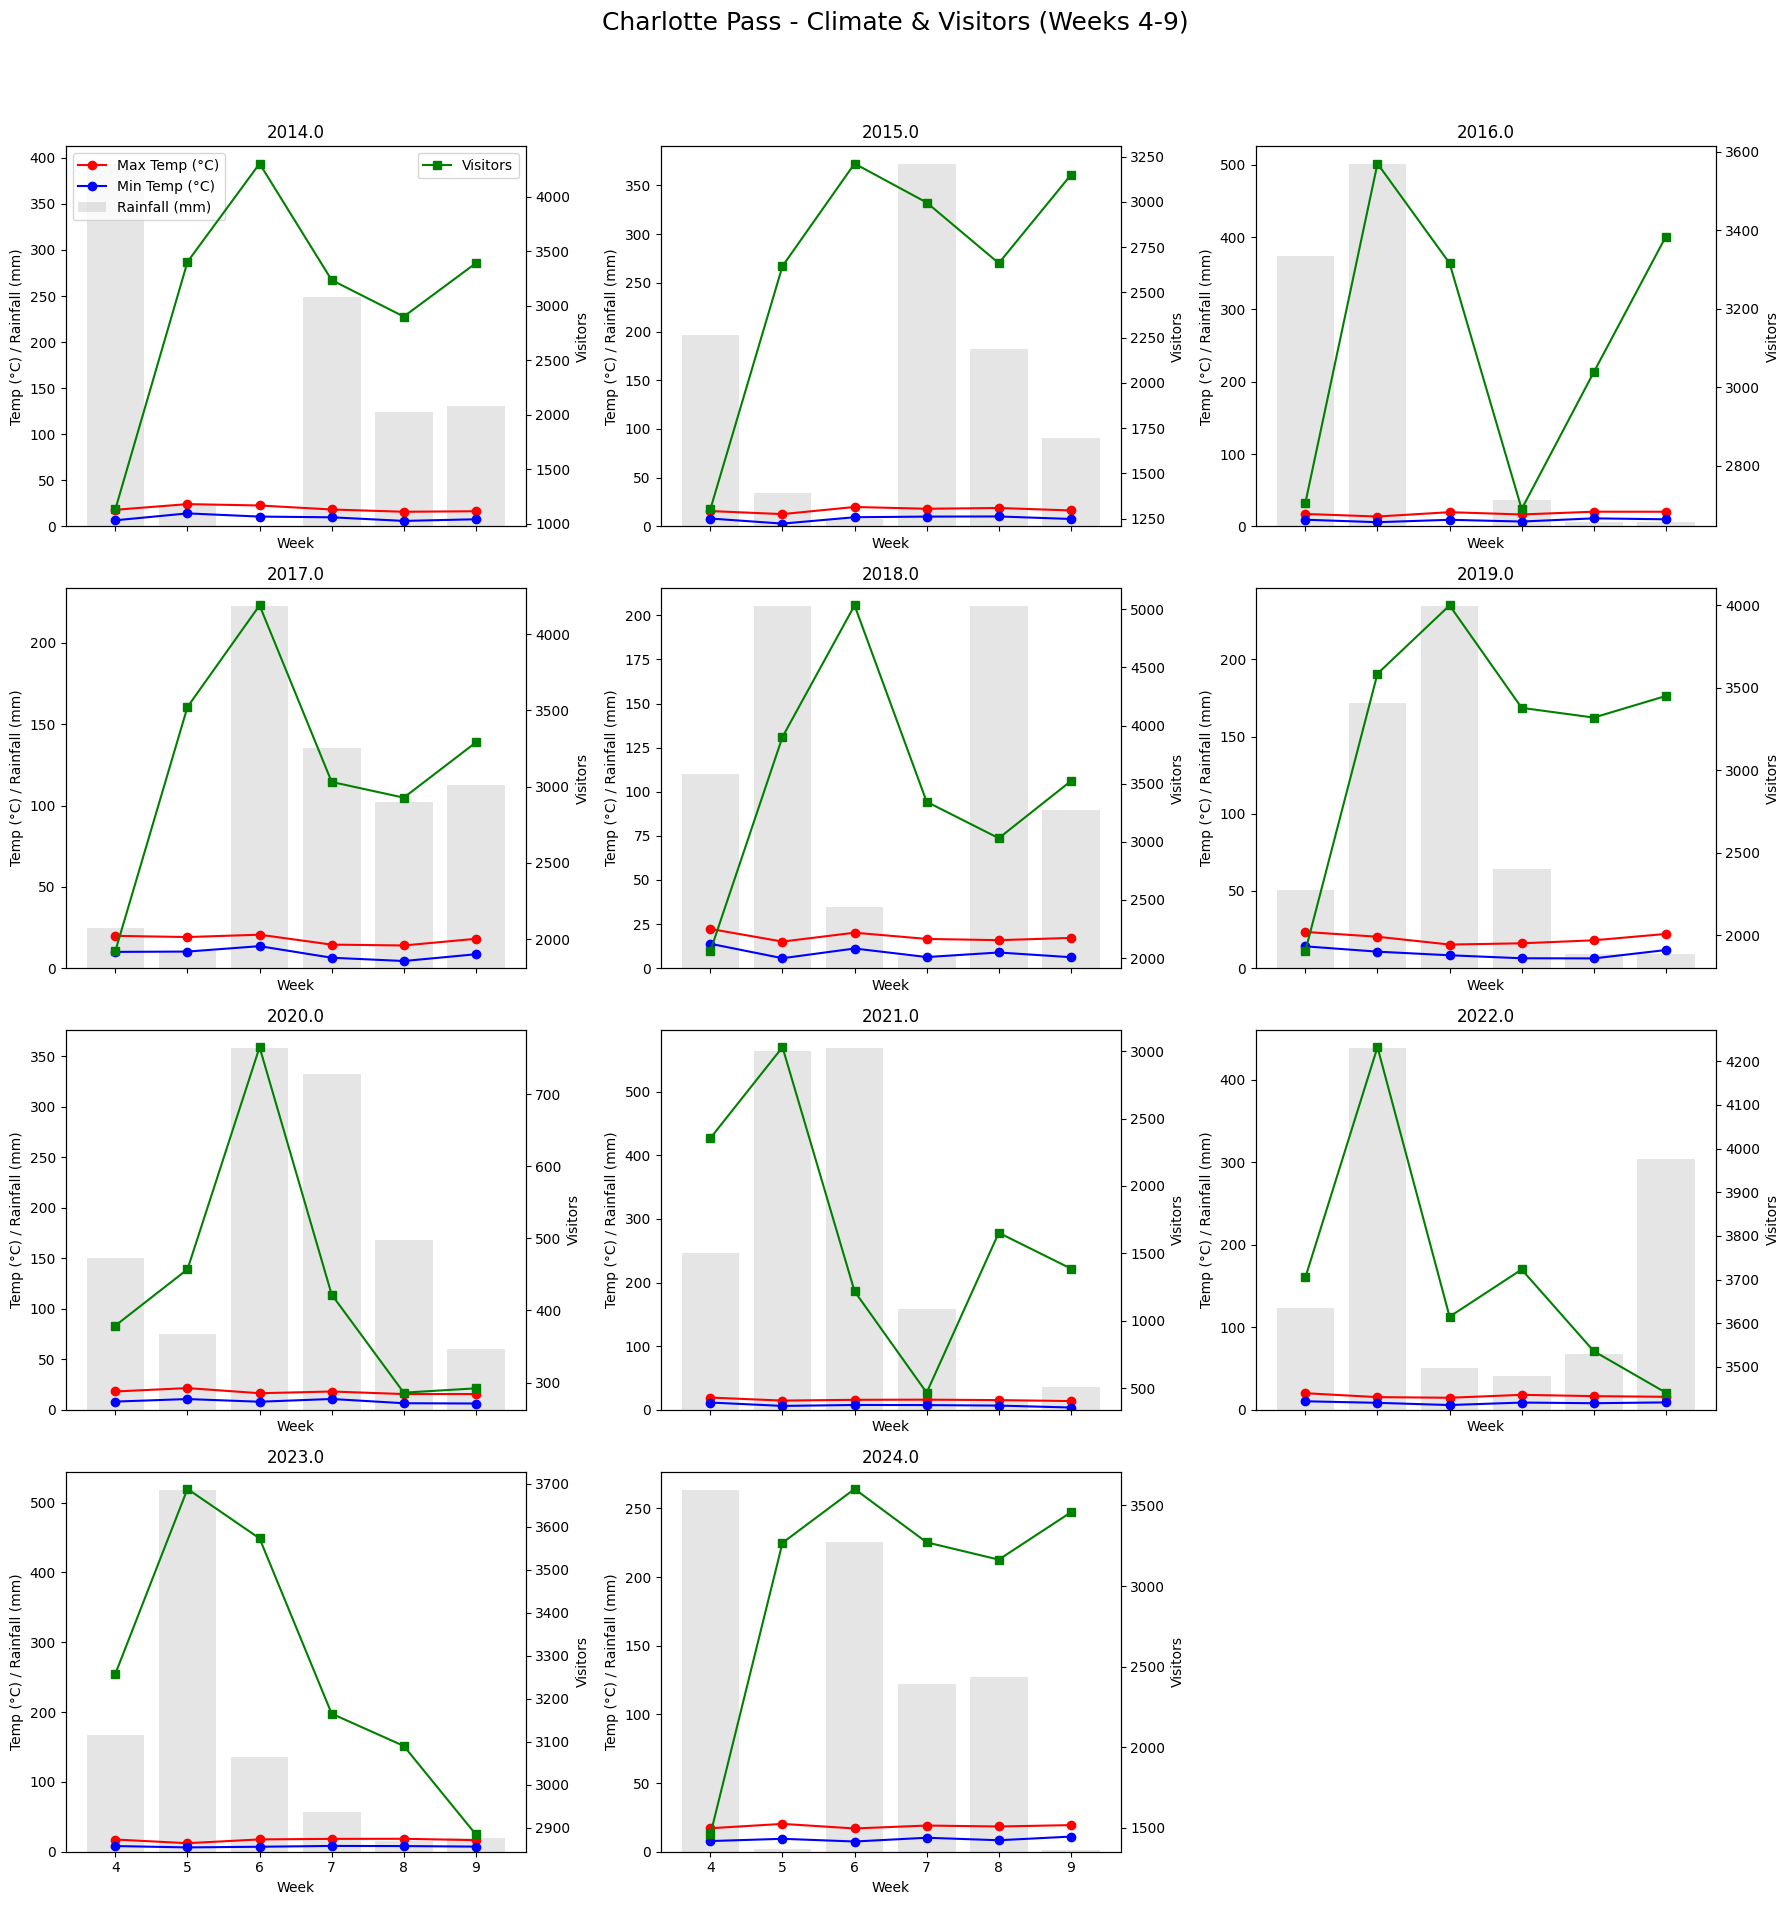

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load data
climate = pd.read_csv("/content/sample_data/Climate Data.csv")
visitation = pd.read_csv("/content/sample_data/Visitation Data.csv")

weeks_of_interest = [4, 5, 6, 7, 8, 9]
parks = [col for col in visitation.columns if col not in ["Year", "Week"]]
years = sorted(visitation["Year"].dropna().unique())

for park in parks:
    n_years = len(years)
    n_cols = 3
    n_rows = math.ceil(n_years / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5), sharex=True)
    axes = axes.flatten()

    for idx, year in enumerate(years):
        ax1 = axes[idx]

        # Prepare visitation data
        vis = visitation[(visitation["Year"] == year) & (visitation["Week"].isin(weeks_of_interest))]

        # Prepare climate data
        climate_year = climate[climate["Year"] == year].copy()
        if climate_year.empty:
            continue
        climate_year["Date"] = pd.to_datetime(dict(year=climate_year["Year"], month=climate_year["Month"], day=climate_year["Day"]))
        climate_year["DayOfYear"] = climate_year["Date"].dt.dayofyear
        climate_year["Week"] = ((climate_year["DayOfYear"] - 1) // 7) + 1

        weekly_climate = climate_year.groupby("Week").agg({
            "Maximum temperature (Degree C)": "mean",
            "Minimum temperature (Degree C)": "mean",
            "Rainfall amount (millimetres)": "sum"
        }).reset_index()

        climate_plot = weekly_climate[weekly_climate["Week"].isin(weeks_of_interest)]

        # Climate data
        ax1.plot(climate_plot["Week"], climate_plot["Maximum temperature (Degree C)"], 'r-o', label="Max Temp (°C)")
        ax1.plot(climate_plot["Week"], climate_plot["Minimum temperature (Degree C)"], 'b-o', label="Min Temp (°C)")
        ax1.bar(climate_plot["Week"], climate_plot["Rainfall amount (millimetres)"], alpha=0.2, color='gray', label="Rainfall (mm)")
        ax1.set_xlabel("Week")
        ax1.set_ylabel("Temp (°C) / Rainfall (mm)")
        ax1.set_title(f"{year}")

        # Visitors on secondary y-axis
        ax2 = ax1.twinx()
        ax2.plot(vis["Week"], vis[park], 'g-s', label="Visitors")
        ax2.set_ylabel("Visitors")

        # Legends (only for the first subplot)
        if idx == 0:
            ax1.legend(loc="upper left")
            ax2.legend(loc="upper right")

    # Hide unused subplots
    for idx in range(len(years), n_rows * n_cols):
        fig.delaxes(axes[idx])

    fig.suptitle(f"{park} - Climate & Visitors (Weeks {weeks_of_interest[0]}-{weeks_of_interest[-1]})", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

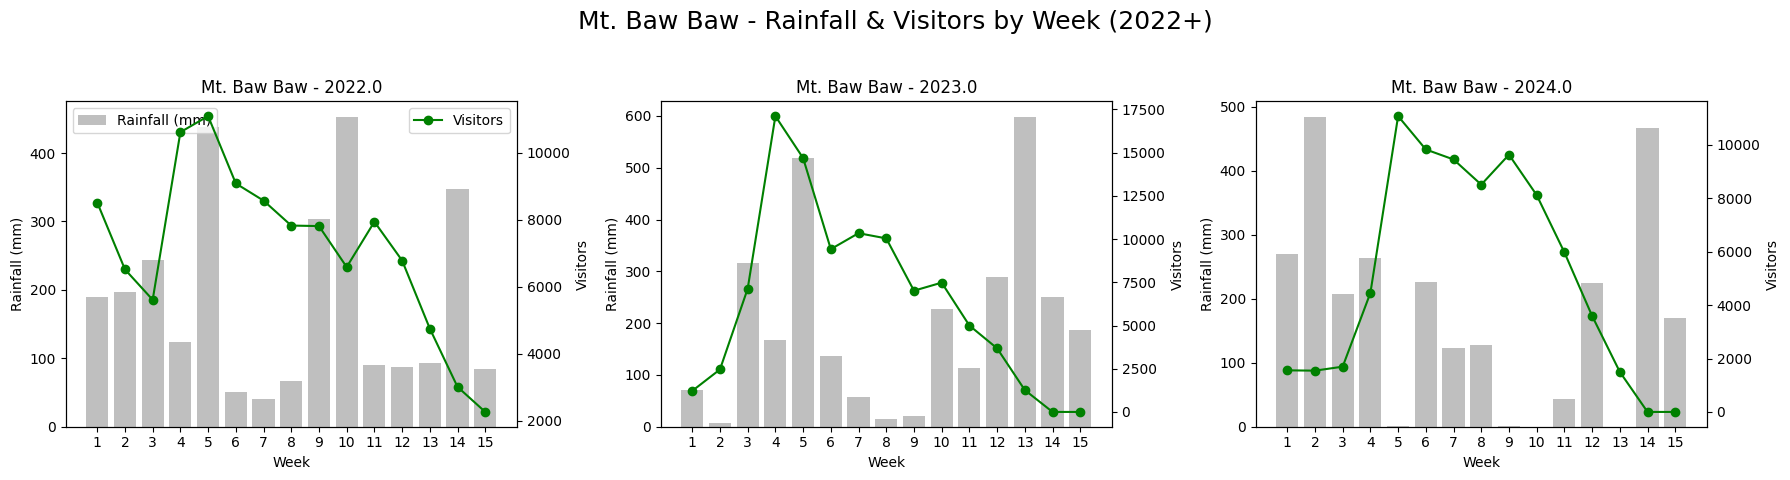

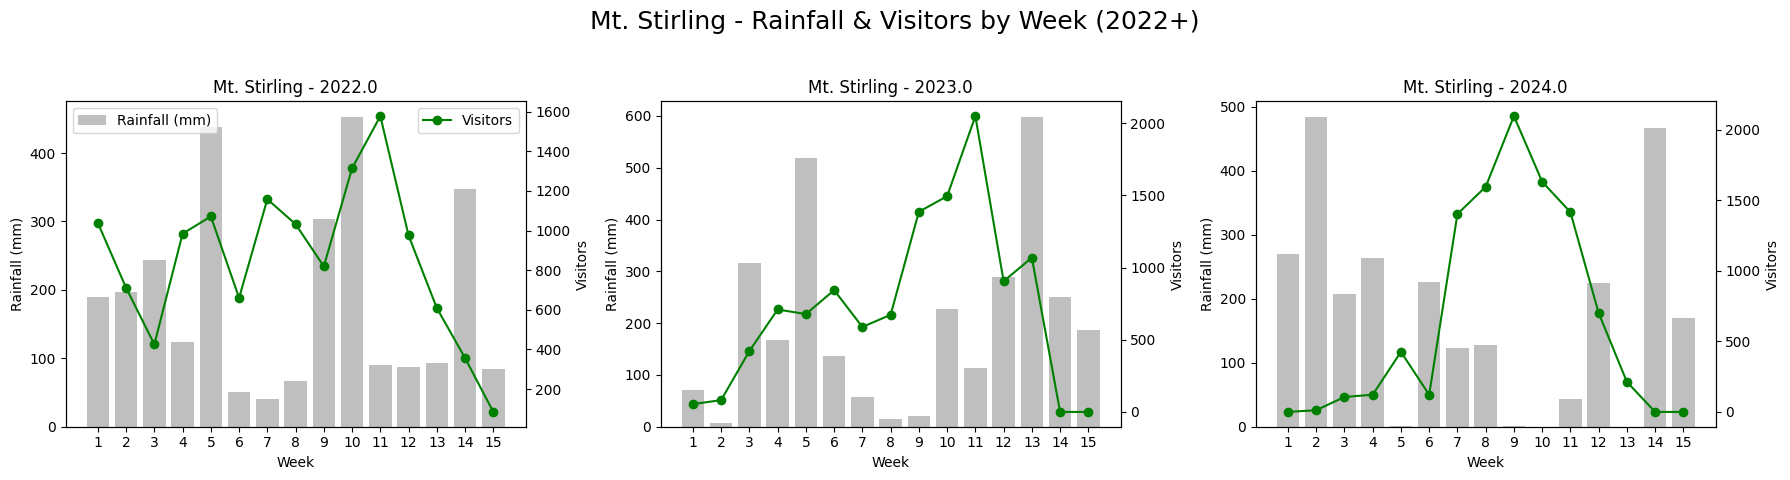

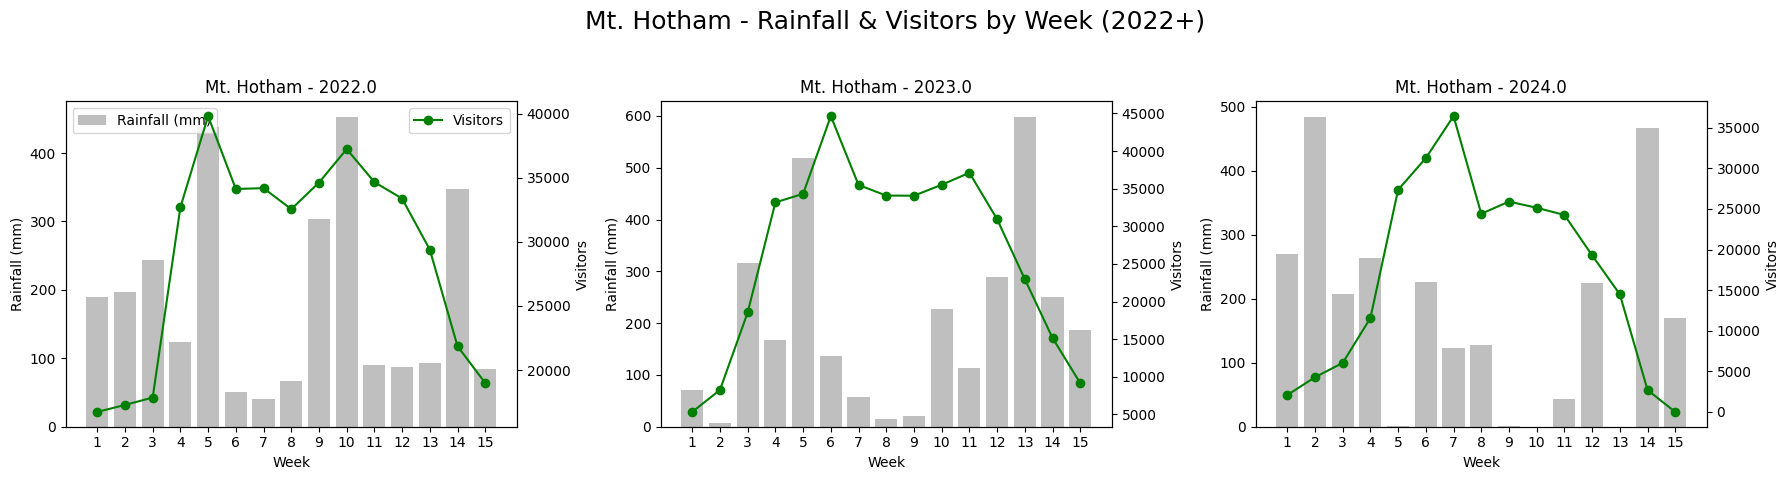

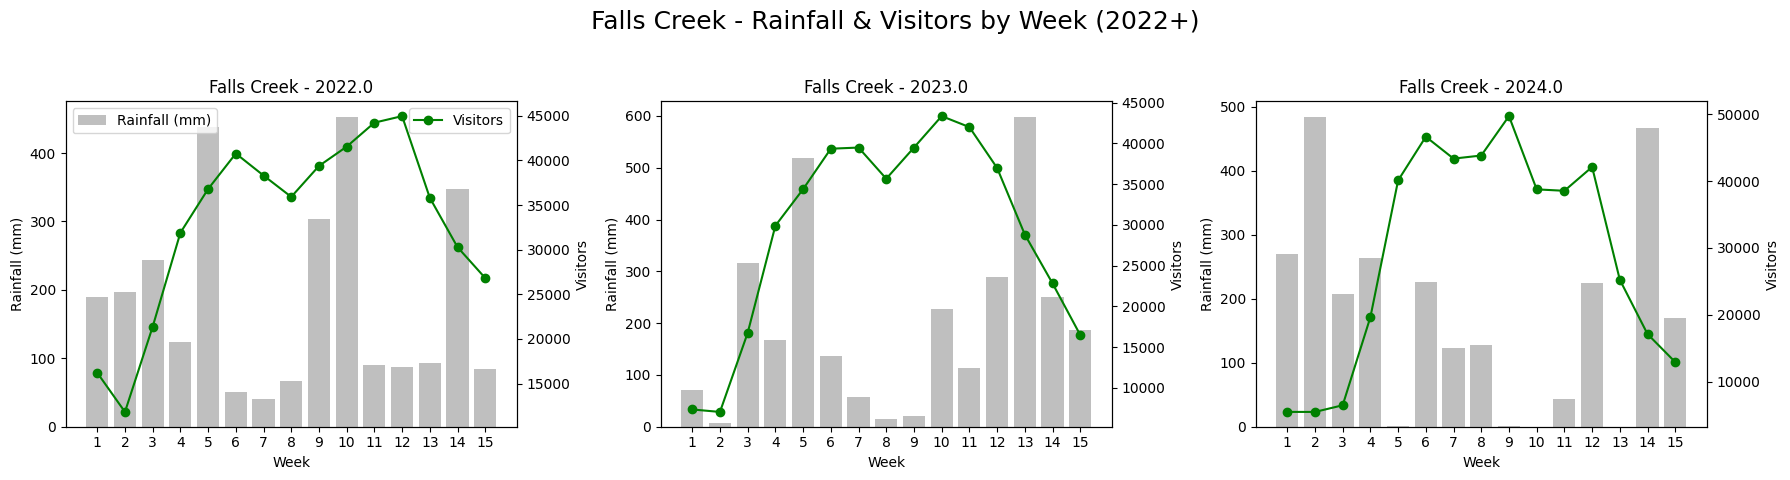

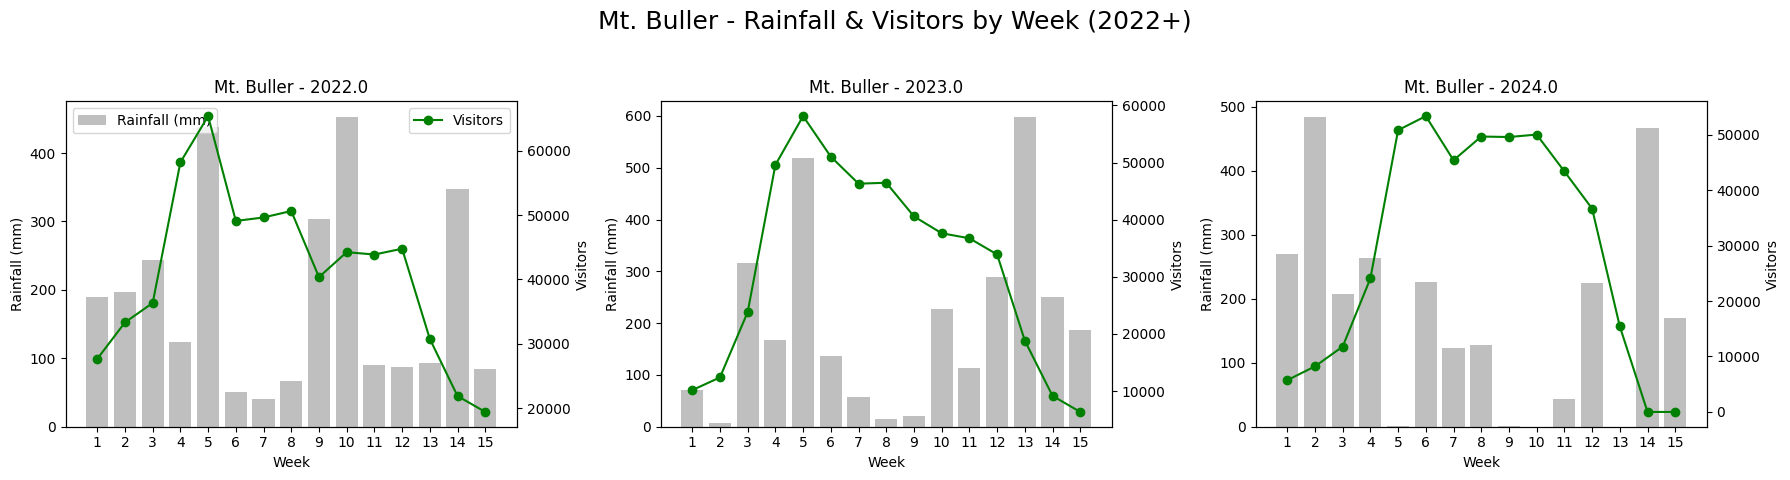

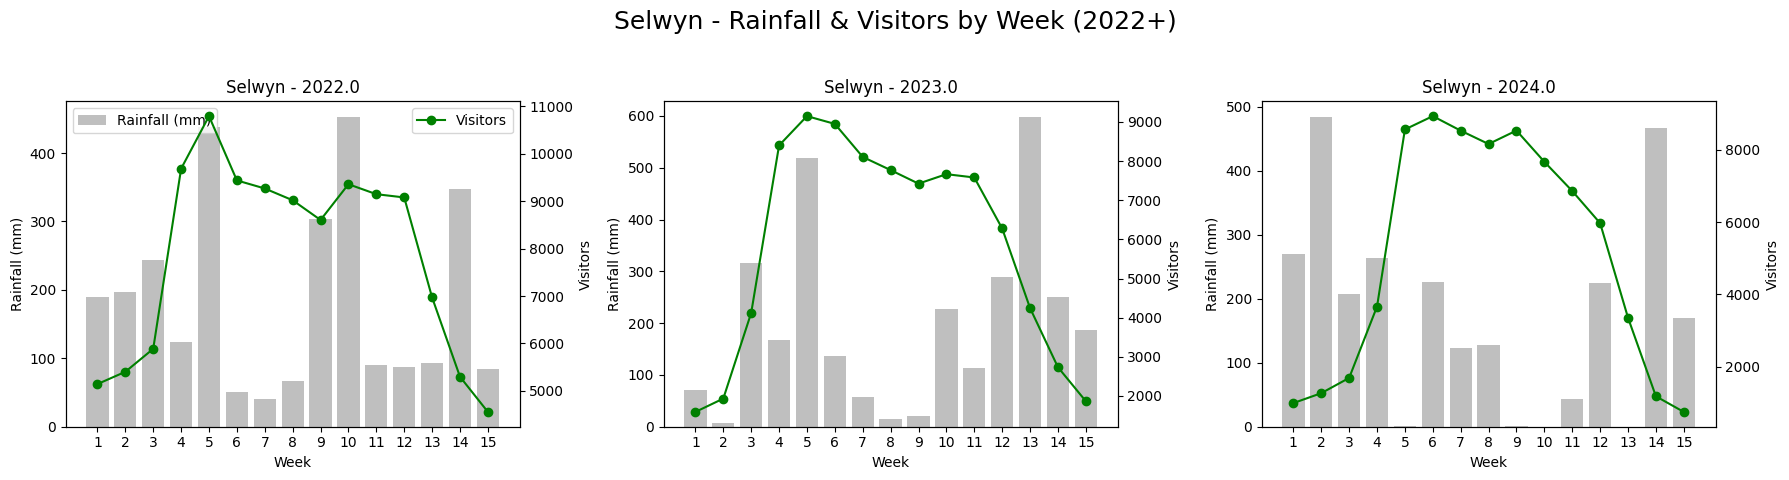

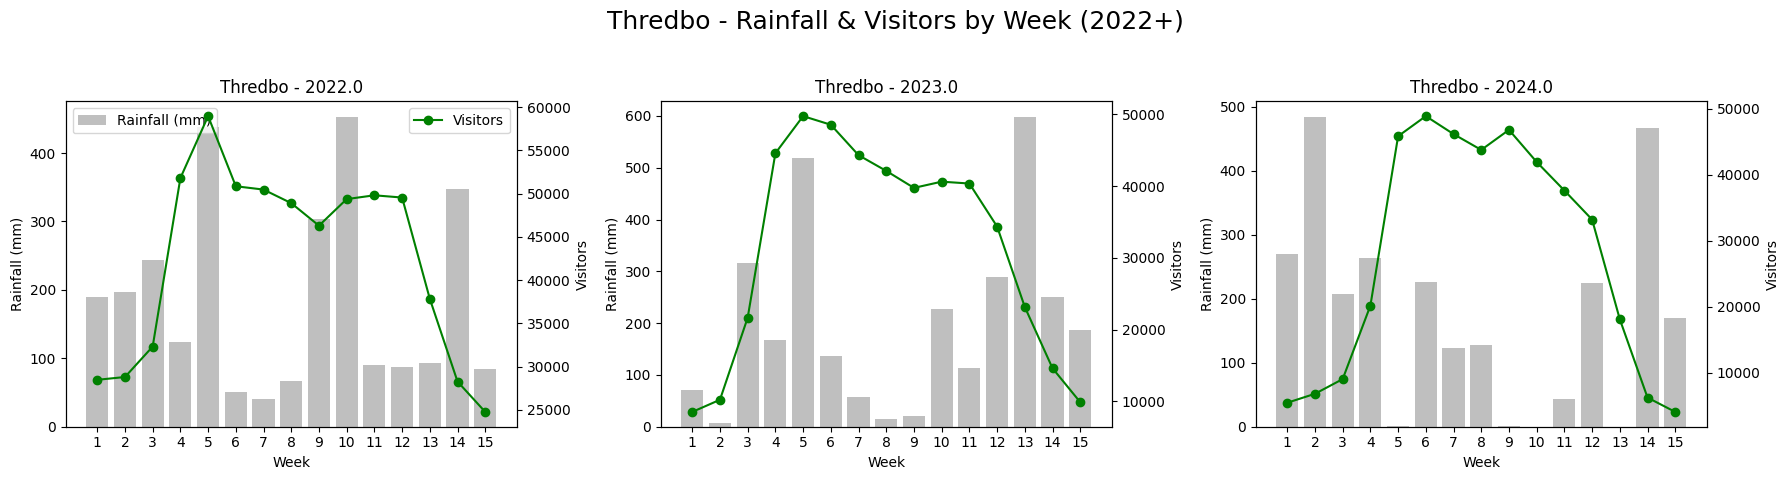

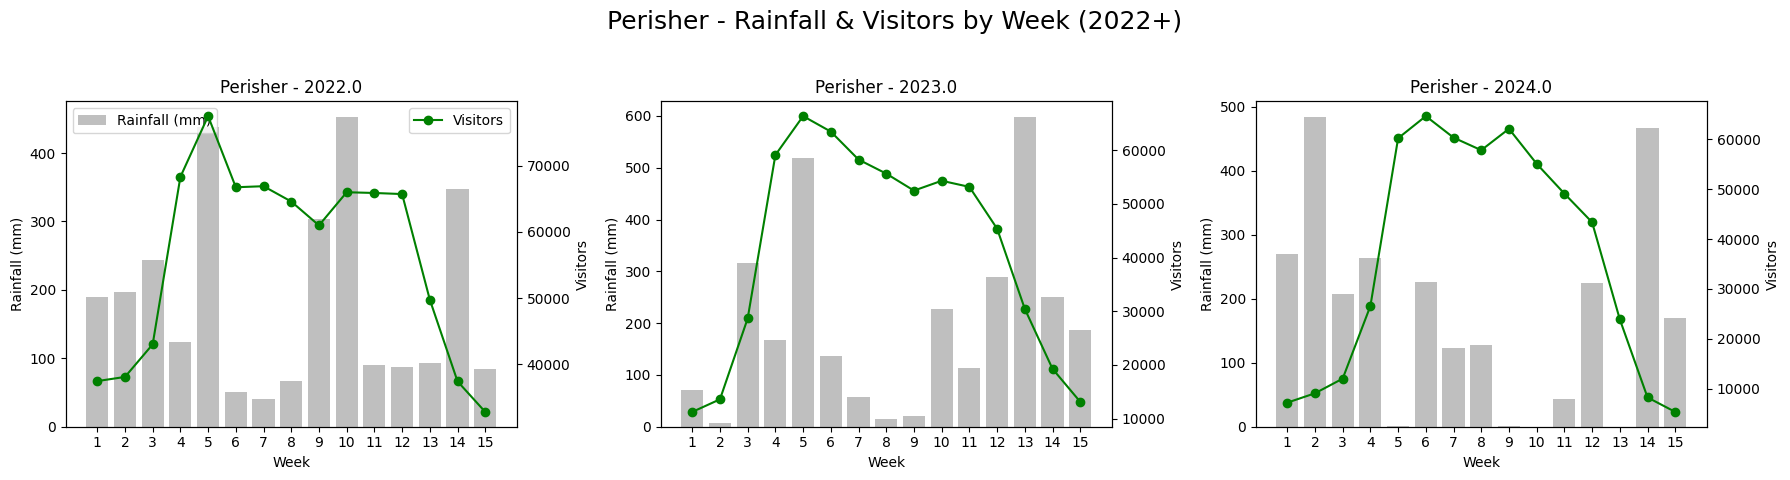

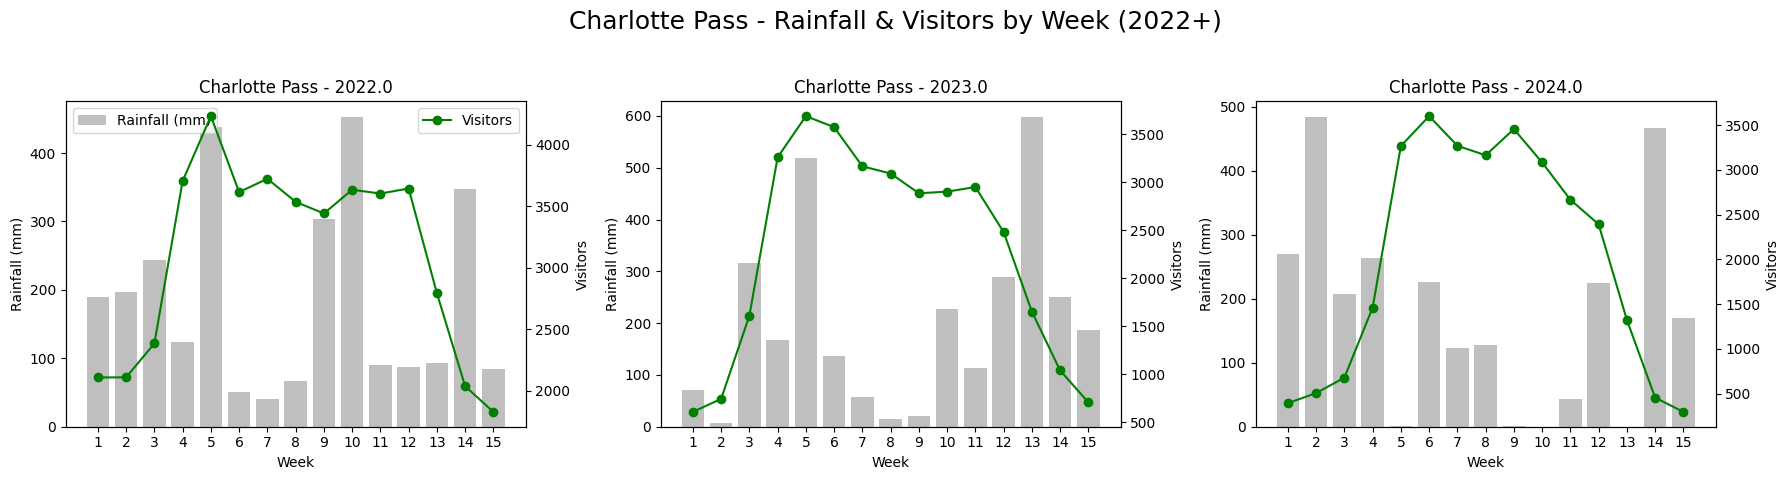

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load data
climate = pd.read_csv("/content/sample_data/Climate Data.csv")
visitation = pd.read_csv("/content/sample_data/Visitation Data.csv")

# Only years from 2022 onwards
years = sorted([y for y in visitation["Year"].dropna().unique() if y >= 2022])
n_years = len(years)
n_cols = 3
n_rows = math.ceil(n_years / n_cols)

# Get all parks (locations)
parks = [col for col in visitation.columns if col not in ["Year", "Week"]]

for park in parks:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5), sharex=True)
    axes = axes.flatten()

    for idx, year in enumerate(years):
        ax = axes[idx]

        # Get the weeks for this year from visitation data
        vis = visitation[(visitation["Year"] == year)][["Week", park]].dropna()
        vis = vis.sort_values("Week")
        weeks = vis["Week"].astype(int).unique()

        # Prepare climate data for this year
        climate_year = climate[climate["Year"] == year].copy()
        if climate_year.empty:
            continue
        climate_year["Date"] = pd.to_datetime(dict(year=climate_year["Year"], month=climate_year["Month"], day=climate_year["Day"]))
        climate_year["DayOfYear"] = climate_year["Date"].dt.dayofyear
        climate_year["Week"] = ((climate_year["DayOfYear"] - 1) // 7) + 1

        weekly_climate = climate_year.groupby("Week").agg({
            "Rainfall amount (millimetres)": "sum"
        }).reset_index()

        # Filter rainfall to only weeks present in visitation data
        weekly_climate = weekly_climate[weekly_climate["Week"].isin(weeks)]

        # Plot rainfall
        ax.bar(weekly_climate["Week"], weekly_climate["Rainfall amount (millimetres)"], alpha=0.5, color='gray', label="Rainfall (mm)")
        # Plot visitors on secondary y-axis
        ax2 = ax.twinx()
        ax2.plot(vis["Week"], vis[park], 'g-o', label="Visitors")
        ax.set_xlabel("Week")
        ax.set_ylabel("Rainfall (mm)")
        ax2.set_ylabel("Visitors")
        ax.set_title(f"{park} - {year}")

        # Set x-ticks to match visitation weeks
        ax.set_xticks(weeks)

        # Add legends only to the first subplot
        if idx == 0:
            ax.legend(loc="upper left")
            ax2.legend(loc="upper right")

    # Hide unused subplots
    for idx in range(len(years), n_rows * n_cols):
        fig.delaxes(axes[idx])

    fig.suptitle(f"{park} - Rainfall & Visitors by Week (2022+)", fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()